In [2]:
import pandas as pd

dtype_dict = {
    'wm_yr_wk': 'int32',
    'wday': 'int8',
    'month': 'int8',
    'year': 'int32',
    'snap_CA': 'int8',
    'snap_WI': 'int8',
    'snap_TX': 'int8',
    'is_weekend': 'int8',
    'events_per_day': 'int8',
    'month_day': 'int32',
    'week_number': 'int32'
}
df = pd.read_csv('final_df_modeling.csv', dtype=dtype_dict)

#Changing the date column data type to datetime data
df['date'] = pd.to_datetime(df['date'])

#Dropping weekday and d since we already have similar data day and wday.
df = df.drop(['Unnamed: 0','d','weekday'], inplace = False, axis = 1)

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46881677 entries, 0 to 46881676
Data columns (total 50 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 object        
 1   item_id            object        
 2   dept_id            object        
 3   cat_id             object        
 4   store_id           object        
 5   state_id           object        
 6   sell_quantity      int64         
 7   date               datetime64[ns]
 8   wm_yr_wk           int32         
 9   wday               int8          
 10  month              int8          
 11  year               int32         
 12  event_name_1       object        
 13  event_type_1       object        
 14  event_name_2       object        
 15  event_type_2       object        
 16  snap_CA            int8          
 17  snap_TX            int8          
 18  snap_WI            int8          
 19  day                int64         
 20  is_weekend         int

In [7]:
df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_008_CA_1_evaluation  HOBBIES_1_008  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_009_CA_1_evaluation  HOBBIES_1_009  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_010_CA_1_evaluation  HOBBIES_1_010  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_012_CA_1_evaluation  HOBBIES_1_012  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_015_CA_1_evaluation  HOBBIES_1_015  HOBBIES_1  HOBBIES     CA_1   

  state_id  sell_quantity       date  wm_yr_wk  wday  ...  rolling_median_42  \
0       CA             12 2011-01-29     11101     1  ...                0.0   
1       CA              2 2011-01-29     11101     1  ...                0.0   
2       CA              0 2011-01-29     11101     1  ...                0.0   
3       CA              0 2011-01-29     11101     1  ...                0.0   
4       CA              4 2011-01-29     11101     1  ...                0.0   

   rolling_median_49 rolling_median_56 rolling_std_7 rolling_std_14  \
0                0.0               0.0           0.0            0.0   
1                0.0               0.0           0.0            0.0   
2                0.0               0.0           0.0            0.0   
3                0.0               0.0           0.0            0.0   
4                0.0               0.0           0.0            0.0   

  rolling_std_28  rolling_std_35  rolling_std_42  rolling_std_49  \
0            0.0             0.0             0.0             0.0   
1            0.0             0.0             0.0             0.0   
2            0.0             0.0             0.0             0.0   
3            0.0             0.0             0.0             0.0   
4            0.0             0.0             0.0             0.0   

   rolling_std_56  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 50 columns]

In [8]:
df.tail()

id      item_id  dept_id cat_id store_id  \
46881672  FOODS_3_823_WI_3_evaluation  FOODS_3_823  FOODS_3  FOODS     WI_3   
46881673  FOODS_3_824_WI_3_evaluation  FOODS_3_824  FOODS_3  FOODS     WI_3   
46881674  FOODS_3_825_WI_3_evaluation  FOODS_3_825  FOODS_3  FOODS     WI_3   
46881675  FOODS_3_826_WI_3_evaluation  FOODS_3_826  FOODS_3  FOODS     WI_3   
46881676  FOODS_3_827_WI_3_evaluation  FOODS_3_827  FOODS_3  FOODS     WI_3   

         state_id  sell_quantity       date  wm_yr_wk  wday  ...  \
46881672       WI              1 2016-05-22     11617     2  ...   
46881673       WI              0 2016-05-22     11617     2  ...   
46881674       WI              2 2016-05-22     11617     2  ...   
46881675       WI              0 2016-05-22     11617     2  ...   
46881676       WI              1 2016-05-22     11617     2  ...   

          rolling_median_42  rolling_median_49 rolling_median_56  \
46881672               0.00               0.00              0.00   
46881673               0.00               0.00              0.00   
46881674               1.99               3.98              3.98   
46881675               1.28               1.28              1.28   
46881676               0.00               0.00              0.50   

         rolling_std_7 rolling_std_14 rolling_std_28  rolling_std_35  \
46881672      1.592877       2.508854       2.461956        2.317977   
46881673      1.210116       0.900579       1.325616        1.253473   
46881674      3.580947       4.415414       3.650486        3.526006   
46881675      2.902767       2.113076       1.672677        1.659402   
46881676      1.976047       1.823232       1.481366        1.414214   

          rolling_std_42  rolling_std_49  rolling_std_56  
46881672        2.386076        2.285944        2.190370  
46881673        1.232054        1.358737        1.330878  
46881674        3.983465        4.317650        4.141481  
46881675        1.629863        1.523047        1.525540  
46881676        1.341944        1.317078        1.592902  

[5 rows x 50 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder

le_event = LabelEncoder()  

le_itemid = LabelEncoder() 
le_deptid = LabelEncoder() 
le_catid = LabelEncoder() 
le_stateid = LabelEncoder() 
le_storeid = LabelEncoder() 

event_category=['event_name_1','event_type_1','event_name_2','event_type_2']


# Combine the columns into a single series
combined_series = pd.concat([df['event_name_1'], df['event_type_1'], df['event_name_2'], df['event_type_2']])
#Create a encode list based on event type and event name since the data name are not overlapping
le_event.fit(combined_series)
for i in event_category:
    df[i]=le_event.transform(df[i])


#Create a encode list for item_id
le_itemid.fit(df['item_id'])
df['item_id'] = le_itemid.transform(df['item_id'])

#Create a encode list for dept_id
le_deptid.fit(df['dept_id'])
df['dept_id'] = le_deptid.transform(df['dept_id'])

#Create a encode list for cat_id
le_catid.fit(df['cat_id'])
df['cat_id'] = le_catid.transform(df['cat_id'])

#Create a encode list for store_id
le_stateid.fit(df['store_id'])
df['store_id'] = le_stateid.transform(df['store_id'])

#Create a encode list for state_id
le_storeid.fit(df['state_id'])
df['state_id'] = le_storeid.transform(df['state_id'])

In [11]:
df.head()

id  item_id  dept_id  cat_id  store_id  \
0  HOBBIES_1_008_CA_1_evaluation     1444        3       1         0   
1  HOBBIES_1_009_CA_1_evaluation     1445        3       1         0   
2  HOBBIES_1_010_CA_1_evaluation     1446        3       1         0   
3  HOBBIES_1_012_CA_1_evaluation     1448        3       1         0   
4  HOBBIES_1_015_CA_1_evaluation     1451        3       1         0   

   state_id  sell_quantity       date  wm_yr_wk  wday  ...  rolling_median_42  \
0         0             12 2011-01-29     11101     1  ...                0.0   
1         0              2 2011-01-29     11101     1  ...                0.0   
2         0              0 2011-01-29     11101     1  ...                0.0   
3         0              0 2011-01-29     11101     1  ...                0.0   
4         0              4 2011-01-29     11101     1  ...                0.0   

   rolling_median_49  rolling_median_56  rolling_std_7  rolling_std_14  \
0                0.0                0.0            0.0             0.0   
1                0.0                0.0            0.0             0.0   
2                0.0                0.0            0.0             0.0   
3                0.0                0.0            0.0             0.0   
4                0.0                0.0            0.0             0.0   

   rolling_std_28  rolling_std_35  rolling_std_42  rolling_std_49  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   rolling_std_56  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

[5 rows x 50 columns]

In [12]:
def sell_start_date(df,item):
    starting_date = df['date'][df[item] != 0].min()
    return starting_date

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

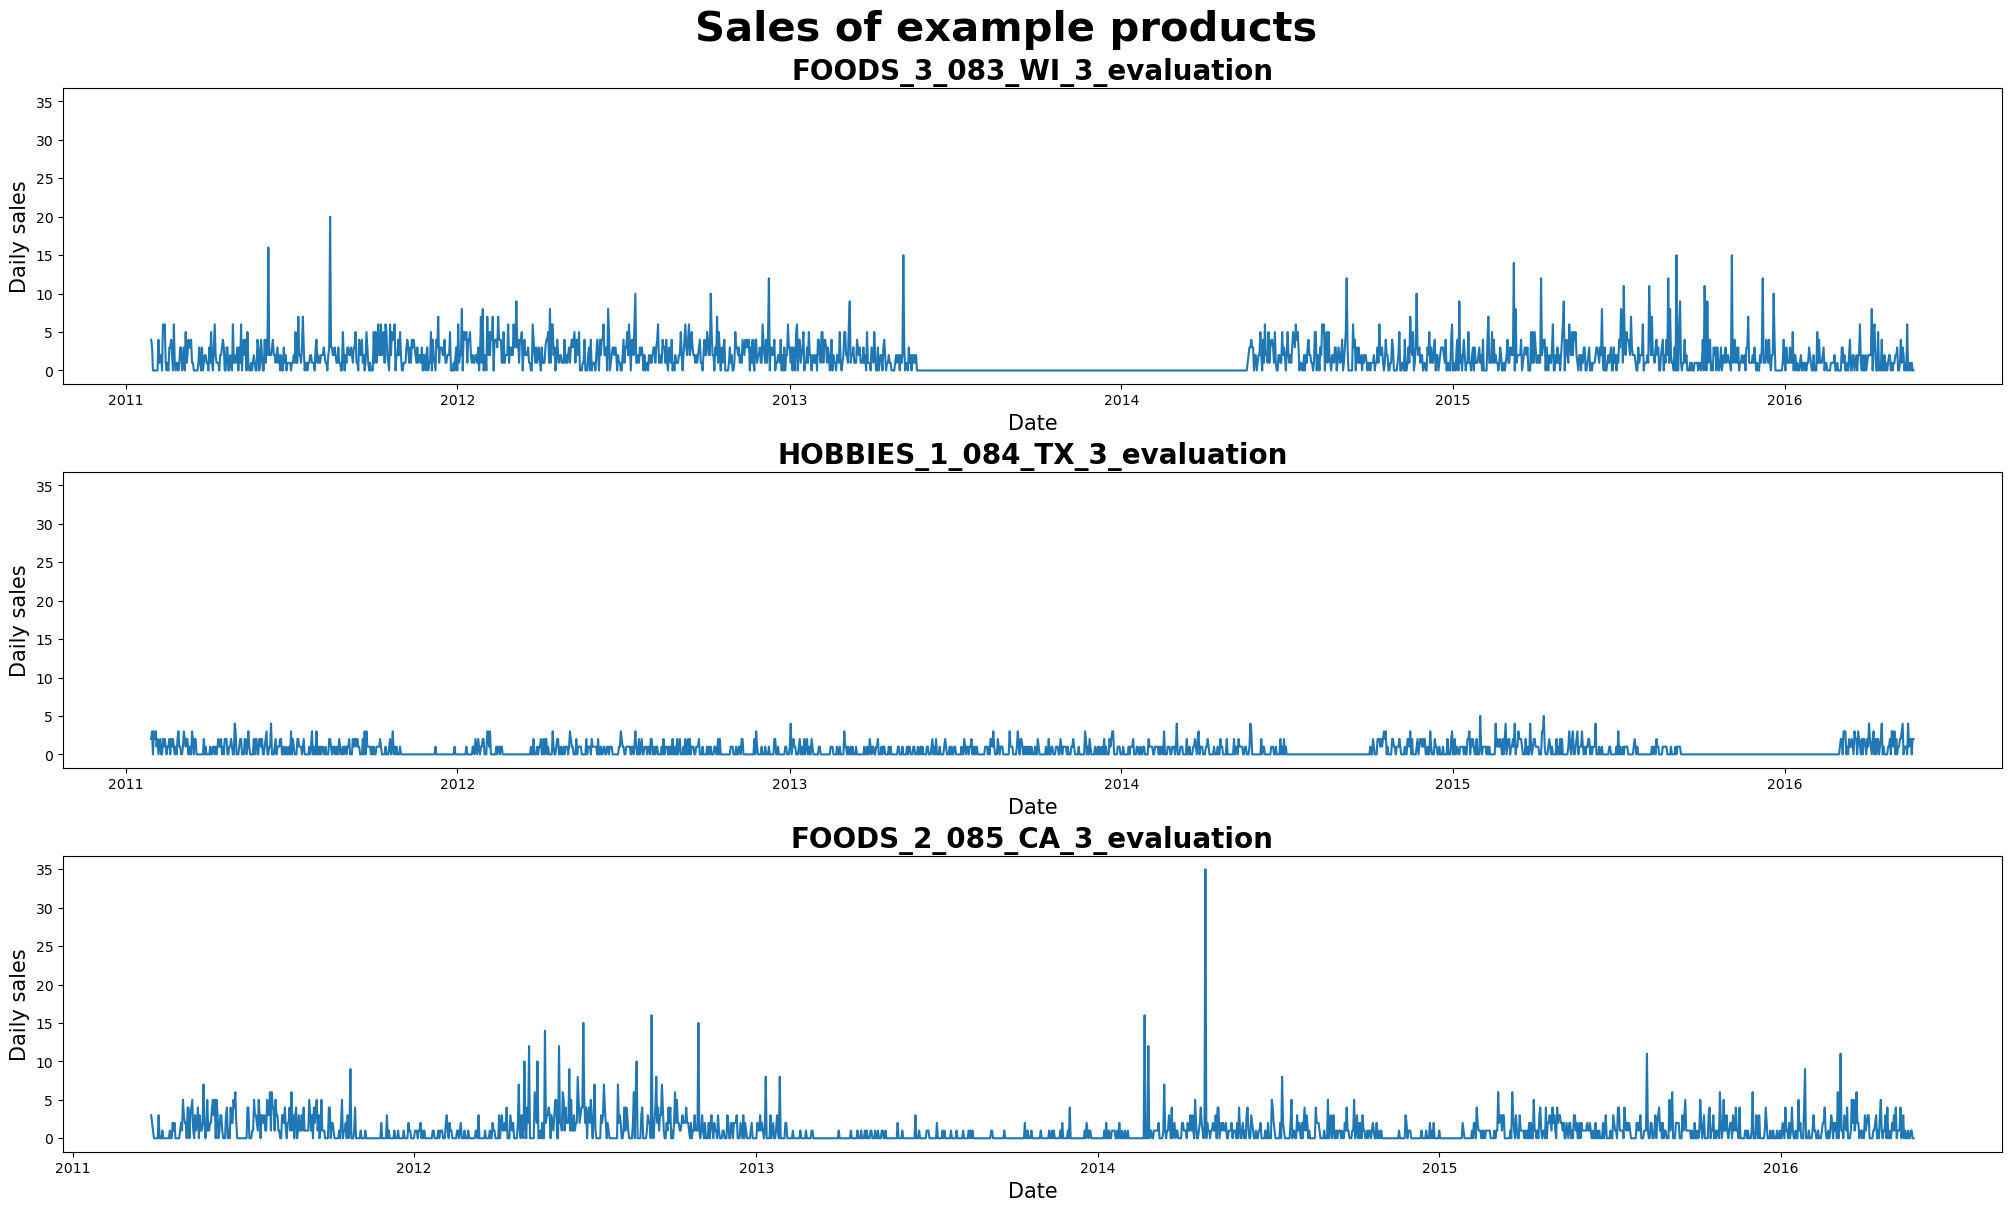

In [13]:

#Plot 3 example items
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_TX_3_evaluation', 'FOODS_2_085_CA_3_evaluation']

fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales of example products', fontsize = 30, weight = 'bold')

for i in range(0,len(multi_items)):
    
    graph_item = sns.lineplot(x = "date", y = 'sell_quantity', data = df[['date','sell_quantity']].loc[df['id'] ==  multi_items[i]], 
                 ax = ax[i]) 
    graph_item.set_title(multi_items[i], size = 20, weight = 'bold')
    graph_item.set_ylabel("Daily sales", fontsize=15)
    graph_item.set_xlabel("Date", fontsize=15)


C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

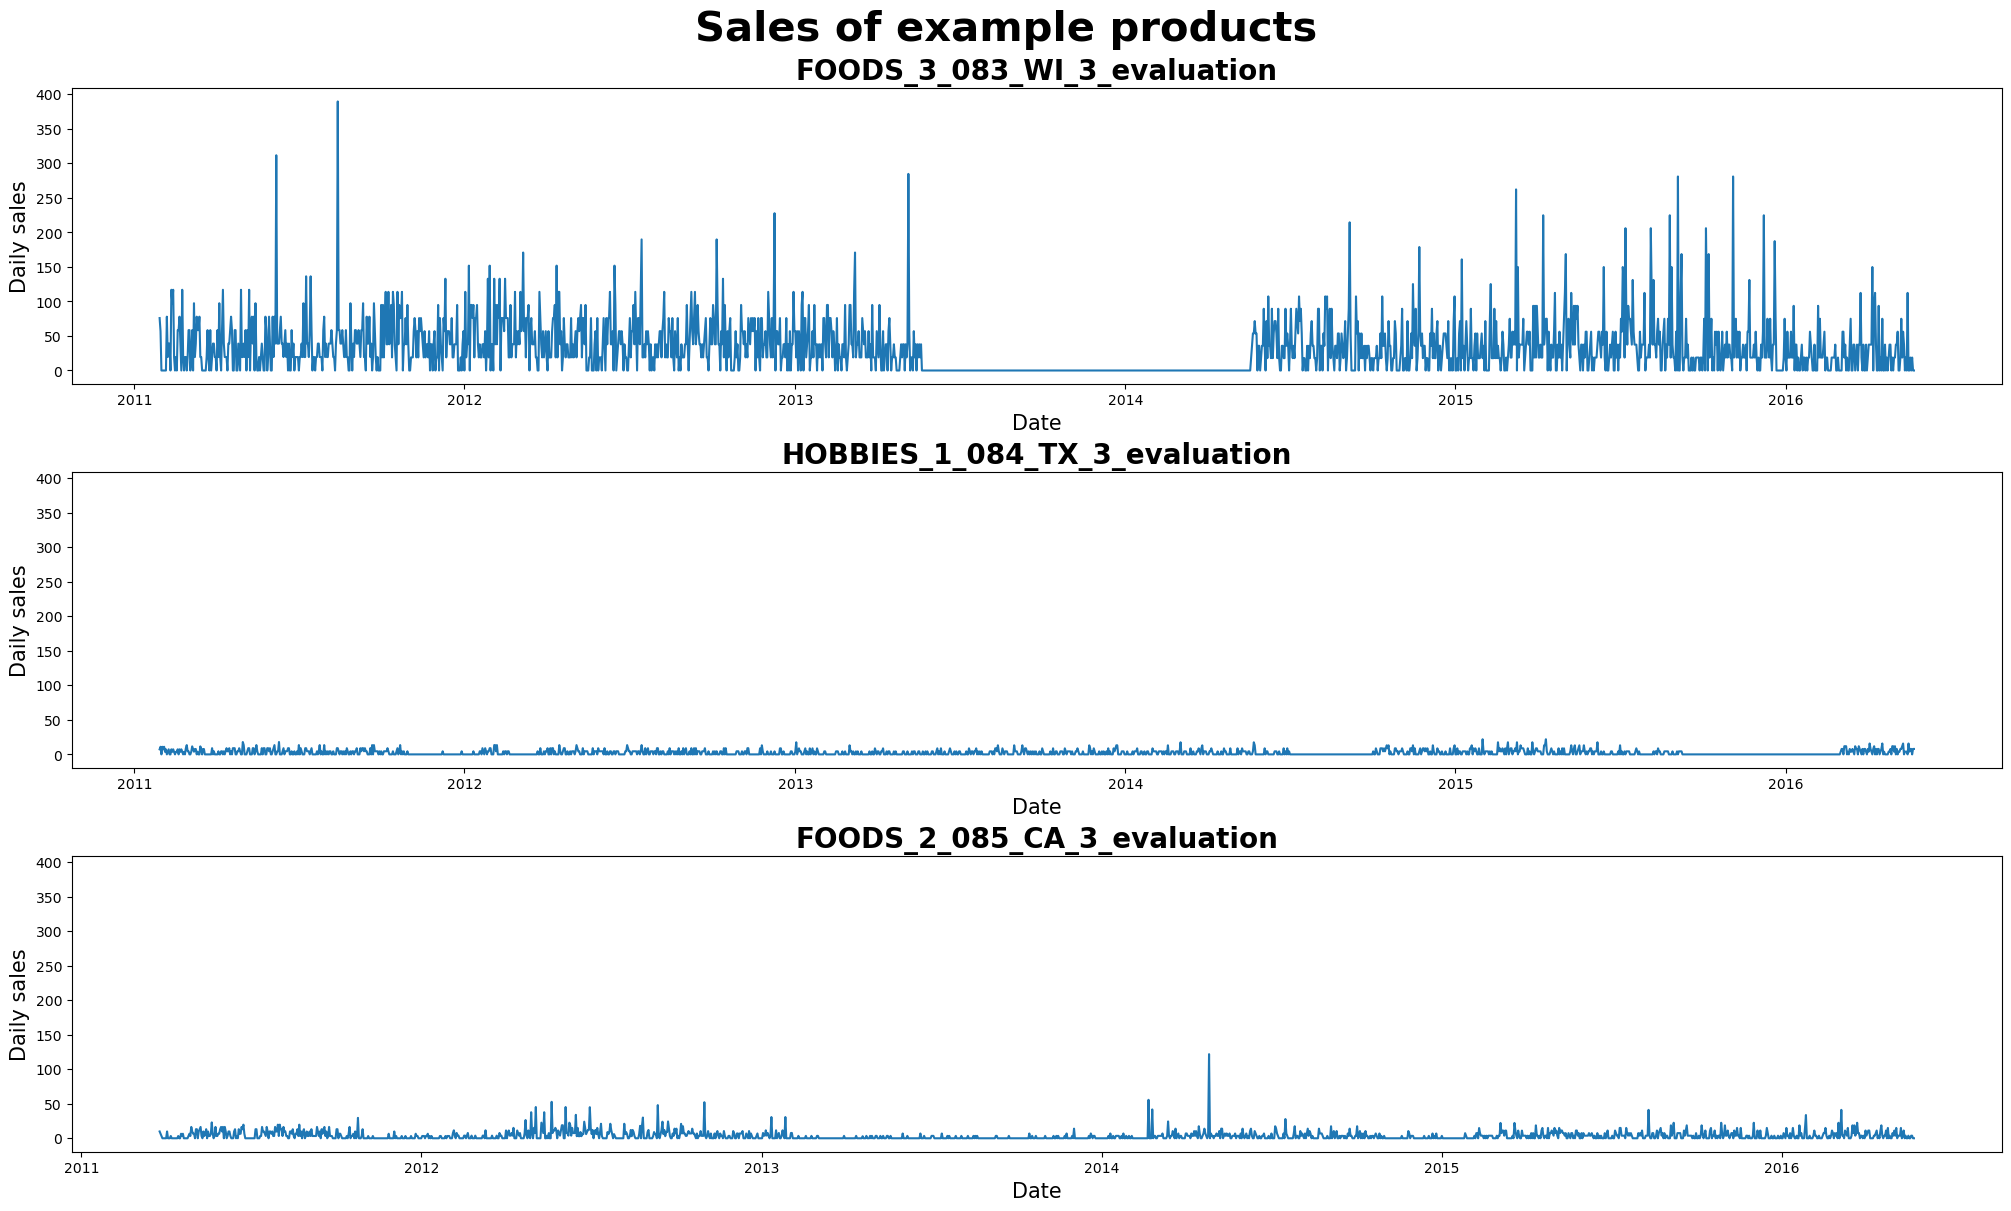

In [14]:

#Plot 3 example items
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_TX_3_evaluation', 'FOODS_2_085_CA_3_evaluation']

fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales of example products', fontsize = 30, weight = 'bold')

for i in range(0,len(multi_items)):
    
    graph_item = sns.lineplot(x = "date", y = 'daily_sell', data = df[['date','daily_sell']].loc[df['id'] ==  multi_items[i]], 
                 ax = ax[i]) 
    graph_item.set_title(multi_items[i], size = 20, weight = 'bold')
    graph_item.set_ylabel("Daily sales", fontsize=15)
    graph_item.set_xlabel("Date", fontsize=15)


In [15]:
df.isna().sum()

id                   0
item_id              0
dept_id              0
cat_id               0
store_id             0
state_id             0
sell_quantity        0
date                 0
wm_yr_wk             0
wday                 0
month                0
year                 0
event_name_1         0
event_type_1         0
event_name_2         0
event_type_2         0
snap_CA              0
snap_TX              0
snap_WI              0
day                  0
is_weekend           0
month_day            0
week_number          0
events_per_day       0
sell_price           0
daily_sell           0
lag_1                0
lag_2                0
lag_3                0
lag_7                0
lag_14               0
lag_21               0
lag_28               0
lag_35               0
lag_42               0
lag_49               0
rolling_median_7     0
rolling_median_14    0
rolling_median_28    0
rolling_median_35    0
rolling_median_42    0
rolling_median_49    0
rolling_median_56    0
rolling_std

In [ ]:
df_2 = df.copy()


## Transform the data


Testing with few products

In [295]:
test_df = df[['id','date','day','daily_sell']].loc[ (df['id'] == 'HOUSEHOLD_1_278_CA_3_evaluation') | (df['id'] == 'FOODS_3_083_WI_3_evaluation') | (df['id'] == 'HOBBIES_1_084_TX_3_evaluation') | (df['id'] == 'FOODS_2_085_CA_3_evaluation')].sort_values(by= ['id','date'])

In [309]:
len(lis)

23836

In [305]:
test_df =  df[['id','date','day','daily_sell']].loc[ df['id'].isin(lis)]

In [323]:
len(df['id'].unique())

30490

In [296]:
test_df[['date','daily_sell']].loc[test_df['id']== 'HOUSEHOLD_1_278_CA_3_evaluation'].head(20)

date  daily_sell
43839611 2016-02-13        5.97
43870101 2016-02-14        0.00
43900591 2016-02-15        0.00
43931081 2016-02-16        0.00
43961571 2016-02-17        0.00
43992061 2016-02-18        0.00
44022551 2016-02-19        5.97
44053041 2016-02-20        5.97
44083531 2016-02-21        0.00
44114021 2016-02-22        0.00
44144511 2016-02-23        0.00
44175001 2016-02-24       11.94
44205491 2016-02-25        0.00
44235981 2016-02-26        5.97
44266471 2016-02-27        0.00
44296961 2016-02-28        5.97
44327451 2016-02-29        5.97
44357941 2016-03-01       11.94
44388431 2016-03-02        0.00
44418921 2016-03-03        0.00

In [69]:
#Caluculate the rolling average
test_df['rolling_mean']=test_df.groupby('id')['daily_sell'].transform(lambda s: s.rolling(r_window,center=False).mean())
test_df['rolling_mean'] = test_df.groupby('id')['rolling_mean'].ffill()
#Replace zero with rolling average
test_df['daily_sell_mod'] = test_df.loc[:, 'daily_sell']
test_df['daily_sell_mod'] = np.where(test_df['daily_sell_mod'] == 0, test_df['rolling_mean'], test_df['daily_sell_mod'])

In [321]:
id_product = test_df['id'].unique()
len(id_product)

23836

In [283]:
lis = df_2['id'].loc[df_2['daily_sell_mod'].isna()].unique()

In [285]:
test_df['id'].loc[test_df['daily_sell_mod'].isna()].unique()

array(['HOBBIES_1_010_CA_1_evaluation', 'HOBBIES_1_012_CA_1_evaluation',
       'HOBBIES_1_028_CA_1_evaluation', ...,
       'HOUSEHOLD_1_400_CA_4_evaluation',
       'HOUSEHOLD_1_020_WI_2_evaluation',
       'HOUSEHOLD_1_278_CA_3_evaluation'], dtype=object)

In [ ]:
from tqdm import tqdm
import numpy as np

#Creating funtion to run reverse rolling mean
def reverse_rolling_mean(s):
    return s[::-1].rolling(window=r_window, min_periods=1).mean()[::-1]

r_window = 3
previous_size = 0
loop_count = 0
test_df['daily_sell_mod'] = test_df.loc[:, 'daily_sell']
#Loop until all zeros are non-zero. In each loop, zero will be filled with rolling average
while test_df['daily_sell_mod'].eq(0).any():
    #Caluculate the rolling average
    test_df['rolling_mean']=test_df.groupby('id')['daily_sell_mod'].transform(lambda s: s.rolling(r_window,center=False).mean())
    # test_df['rolling_mean'] = test_df.groupby('id')['rolling_mean'].ffill()
    #Replace zero with rolling average
    # test_df['daily_sell_mod'] = test_df.loc[:, 'daily_sell']
    test_df['daily_sell_mod'] = np.where(test_df['daily_sell_mod'] == 0, test_df['rolling_mean'], test_df['daily_sell_mod'])
    #amount of zero after zeros are filled
    current_size = test_df.loc[test_df['daily_sell_mod'] == 0].shape[0]
    print(current_size)
    #Comparing count of zeros with previous loop. Average may be too low causing the moving average to be zero. Causing an infinite loop
    if current_size == previous_size:
        loop_count = loop_count + 1
        #Allow to loop 10 times
        if loop_count == 10:
            #Replace zero to fill moving average with zero
            test_df['daily_sell_mod'].replace(0, np.nan, inplace=True)
            test_df['daily_sell_mod'] = test_df.groupby('id')['daily_sell_mod'].ffill()
            test_df['daily_sell_mod'].replace(np.nan, 0, inplace=True)
            #If there is still a zero there is zero at the beginning of the period
            if test_df['daily_sell_mod'].eq(0).any() == True:
                loop_count = 0
                previous_size = 0
                break
    previous_size = test_df.loc[test_df['daily_sell_mod'] == 0].shape[0]


#Loop until all zeros are non-zero. In each loop, zero will be filled with rolling average in reverse direction
while test_df['daily_sell_mod'].eq(0).any():
    
    test_df['rolling_mean'] = test_df.groupby('id')['daily_sell_mod'].transform(reverse_rolling_mean)
    # test_df['rolling_mean'] = test_df.groupby('id')['rolling_mean'].bfill()
    #Replace zero with rolling average
    # test_df['daily_sell_mod'] = test_df.loc[:, 'daily_sell']
    test_df['daily_sell_mod'] = np.where(test_df['daily_sell_mod'] == 0, test_df['rolling_mean'], test_df['daily_sell_mod'])
    current_size = table.loc[table['daily_sell_mod'] == 0].shape[0]
    print(current_size)
    print( len(test_df['id'].loc[test_df['daily_sell_mod'] == 0].unique()))
    if current_size == previous_size:
        loop_count = loop_count + 1
        if loop_count == 10:
            test_df['daily_sell_mod'].replace(0, np.nan, inplace=True)
            test_df['daily_sell_mod'] = test_df.groupby('id')['daily_sell_mod'].bfill()  
    previous_size = table.loc[table['daily_sell_mod'] == 0].shape[0]

In [301]:
test_df.isna().any()

id                False
date              False
day               False
daily_sell        False
daily_sell_mod    False
rolling_mean       True
dtype: bool

In [303]:
zero_counts = (test_df.eq(0)).sum()
print(zero_counts)

id                   0
date                 0
day                  0
daily_sell        2901
daily_sell_mod       0
rolling_mean       132
dtype: int64


In [205]:
test_df['daily_sell_mod'] = test_df.loc[:, 'daily_sell']
test_df['rolling_mean']=test_df.groupby('id')['daily_sell_mod'].transform(lambda s: s.rolling(r_window,center=False).mean())
test_df['daily_sell_mod'] = np.where(test_df['daily_sell_mod'] == 0, test_df['rolling_mean'], test_df['daily_sell_mod'])

In [213]:
#test_df['daily_sell_mod'].replace(0, np.nan, inplace=True)
test_df['daily_sell_mod'] = test_df.groupby('id')['daily_sell_mod'].bfill()       

In [215]:
test_df[['id','date','daily_sell','daily_sell_mod','rolling_mean']].loc[(test_df['id'] == 'FOODS_2_085_CA_3_evaluation') & (test_df['date'] >'2011-03-10')].head(20)

id       date  daily_sell  daily_sell_mod  \
717682  FOODS_2_085_CA_3_evaluation 2011-03-26        9.84        9.840000   
731635  FOODS_2_085_CA_3_evaluation 2011-03-27        6.56        6.560000   
745588  FOODS_2_085_CA_3_evaluation 2011-03-28        3.28        3.280000   
759541  FOODS_2_085_CA_3_evaluation 2011-03-29        0.00        3.280000   
773494  FOODS_2_085_CA_3_evaluation 2011-03-30        0.00        1.093333   
787447  FOODS_2_085_CA_3_evaluation 2011-03-31        0.00        9.840000   
801400  FOODS_2_085_CA_3_evaluation 2011-04-01        0.00        9.840000   
815410  FOODS_2_085_CA_3_evaluation 2011-04-02        0.00        9.840000   
829555  FOODS_2_085_CA_3_evaluation 2011-04-03        9.84        9.840000   
843700  FOODS_2_085_CA_3_evaluation 2011-04-04        0.00        3.280000   
857845  FOODS_2_085_CA_3_evaluation 2011-04-05        0.00        3.280000   
871990  FOODS_2_085_CA_3_evaluation 2011-04-06        0.00        3.280000   
886135  FOODS_2_085_CA_3_evaluation 2011-04-07        3.28        3.280000   
900280  FOODS_2_085_CA_3_evaluation 2011-04-08        0.00        1.093333   
914462  FOODS_2_085_CA_3_evaluation 2011-04-09        0.00        1.093333   
928791  FOODS_2_085_CA_3_evaluation 2011-04-10        0.00        3.280000   
943120  FOODS_2_085_CA_3_evaluation 2011-04-11        0.00        3.280000   
957449  FOODS_2_085_CA_3_evaluation 2011-04-12        0.00        3.280000   
971778  FOODS_2_085_CA_3_evaluation 2011-04-13        0.00        3.280000   
986107  FOODS_2_085_CA_3_evaluation 2011-04-14        0.00        3.280000   

        rolling_mean  
717682           NaN  
731635           NaN  
745588      6.560000  
759541      3.280000  
773494      1.093333  
787447      0.000000  
801400      0.000000  
815410      0.000000  
829555      3.280000  
843700      3.280000  
857845      3.280000  
871990      0.000000  
886135      1.093333  
900280      1.093333  
914462      1.093333  
928791      0.000000  
943120      0.000000  
957449      0.000000  
971778      0.000000  
986107      0.000000

In [333]:
from tqdm import tqdm
import numpy as np

#Creating funtion to run reverse rolling mean
def reverse_rolling_mean(s):
    return s[::-1].rolling(window=r_window, min_periods=1).mean()[::-1]

def rolling_mean_non_zero(table):
    r_window = 3
    previous_size = 0
    loop_count = 0
    table['daily_sell_mod'] = table.loc[:, 'daily_sell']
    #Loop until all zeros are non-zero. In each loop, zero will be filled with rolling average
    while table['daily_sell_mod'].eq(0).any():
        #Caluculate the rolling average
        table['rolling_mean']=table.groupby('id')['daily_sell_mod'].transform(lambda s: s.rolling(r_window,center=False).mean())

        #Replace zero with rolling average
        table['daily_sell_mod'] = np.where(table['daily_sell_mod'] == 0, table['rolling_mean'], table['daily_sell_mod'])
        #amount of zero after zeros are filled
        current_size = table.loc[table['daily_sell_mod'] == 0].shape[0]
        print(current_size)
        #Comparing count of zeros with previous loop. Average may be too low causing the moving average to be zero. Causing an infinite loop
        if current_size == previous_size:
            loop_count = loop_count + 1
            #Allow to loop 10 times
            if loop_count == 10:
                #Replace zero to fill moving average with zero
                table['daily_sell_mod'].replace(0, np.nan, inplace=True)
                table['daily_sell_mod'] = table.groupby('id')['daily_sell_mod'].ffill()
                table['daily_sell_mod'].replace(np.nan, 0, inplace=True)
                #If there is still a zero there is zero at the beginning of the period
                if table['daily_sell_mod'].eq(0).any() == True:
                    loop_count = 0
                    previous_size = 0
                    break
        previous_size = table.loc[table['daily_sell_mod'] == 0].shape[0]

    #Loop until all zeros are non-zero. In each loop, zero will be filled with rolling average in reverse direction
    while table['daily_sell_mod'].eq(0).any():
        table['rolling_mean'] = table.groupby('id')['daily_sell_mod'].transform(lambda s: reverse_rolling_mean(s))

        #Replace zero with rolling average
        table['daily_sell_mod'] = np.where(table['daily_sell_mod'] == 0, table['rolling_mean'], table['daily_sell_mod'])
        current_size = table.loc[table['daily_sell_mod'] == 0].shape[0]
        print(current_size)
              
        if current_size == previous_size:
            loop_count = loop_count + 1
            if loop_count == 10:
                table['daily_sell_mod'].replace(0, np.nan, inplace=True)
                table['daily_sell_mod'] = table.groupby('id')['daily_sell_mod'].bfill()
                
        previous_size = table.loc[table['daily_sell_mod'] == 0].shape[0]

In [335]:
rolling_mean_non_zero(df_2)

17612772
13488680
11243713
9831703
8845920
8108012
7532445
7067868
6680116
6349808
6064362
5812771
5587912
5385154
5201041
5032099
4875607
4729821
4592828
4463141
4340025
4222890
4110562
4002773
3899003
3798876
3702271
3608979
3518952
3432317
3350019
3272878
3198811
3126370
3058619
3001045
2952348
2908178
2865817
2824510
2784340
2745470
2708192
2672177
2637424
2604647
2574145
2545693
2518746
2493011
2468474
2445060
2422735
2401445
2380823
2360916
2341726
2323185
2305218
2287710
2270614
2253956
2237685
2221845
2206423
2191390
2176784
2162526
2148645
2135091
2121915
2109087
2096589
2084482
2072636
2060980
2049614
2038551
2027680
2017082
2006772
1996773
1987010
1977460
1968201
1959178
1950344
1941688
1933239
1924991
1916976
1909240
1901762
1894451
1887265
1880225
1873287
1866487
1859814
1853271
1846823
1840463
1834183
1827992
1821909
1815936
1810083
1804328
1798676
1793119
1787645
1782238
1776940
1771738
1766612
1761537
1756538
1751601
1746717
1741889
1737126
1732428
1727793
1723218
17186

In [339]:
df_2.to_csv('df_ARIMA.csv')

In [265]:
lis = df_2['id'].loc[df_2['daily_sell_mod'].isna()].unique()

In [131]:
df_2[['id','date','day','daily_sell','daily_sell_mod','rolling_mean']].loc[(df_2['id']== 'HOUSEHOLD_1_018_WI_3_evaluation') & (df_2['date'] > '2011-04-04')].head(20)

id       date  day  daily_sell  \
867017   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-05   67         0.0   
881162   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-06   68         0.0   
895307   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-07   69         0.0   
909452   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-08   70         0.0   
923762   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-09   71         0.0   
938091   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-10   72         0.0   
952420   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-11   73         0.0   
966749   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-12   74         0.0   
981078   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-13   75         0.0   
995407   HOUSEHOLD_1_018_WI_3_evaluation 2011-04-14   76         0.0   
1009736  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-15   77         0.0   
1024229  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-16   78         0.0   
1038744  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-17   79         0.0   
1053259  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-18   80         0.0   
1067774  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-19   81         0.0   
1082289  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-20   82         0.0   
1096804  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-21   83         0.0   
1111319  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-22   84         0.0   
1125913  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-23   85         0.0   
1140516  HOUSEHOLD_1_018_WI_3_evaluation 2011-04-24   86         0.0   

         daily_sell_mod  rolling_mean  
867017     1.235241e-13  1.646987e-13  
881162     1.990466e-15  4.382864e-14  
895307     4.065393e-14  5.420525e-14  
909452     1.303056e-14  1.737408e-14  
923762     1.236707e-14  2.083295e-14  
938091     7.281640e-15  9.708853e-15  
952420     2.938119e-15  6.344706e-15  
966749     2.222348e-15  2.963131e-15  
981078     5.359173e-16  7.145565e-16  
995407     0.000000e+00  0.000000e+00  
1009736    0.000000e+00  0.000000e+00  
1024229    0.000000e+00  0.000000e+00  
1038744    0.000000e+00  0.000000e+00  
1053259    0.000000e+00  0.000000e+00  
1067774    0.000000e+00  0.000000e+00  
1082289    0.000000e+00  0.000000e+00  
1096804    0.000000e+00  0.000000e+00  
1111319    0.000000e+00  0.000000e+00  
1125913    0.000000e+00  0.000000e+00  
1140516    0.000000e+00  0.000000e+00

In [105]:
zero_counts = (df_2.eq(0)).sum()
print(zero_counts)

id                          0
item_id                 19403
dept_id               3591218
cat_id               21798313
store_id              4788267
state_id             18559286
sell_quantity        27942406
date                        0
wm_yr_wk                    0
wday                        0
month                       0
year                        0
event_name_1           124189
event_type_1                0
event_name_2                0
event_type_2                0
snap_CA              31462693
snap_TX              31443099
snap_WI              31441279
day                         0
is_weekend           33443355
month_day                   0
week_number                 0
events_per_day       43073327
sell_price                  0
daily_sell           27942406
lag_1                27958090
lag_2                27973345
lag_3                27987219
lag_7                28040303
lag_14               28139700
lag_21               28236912
lag_28               28331401
lag_35    

In [446]:
df_2 = df_2.drop(['daily_sell','rolling_mean'], axis = 1)

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

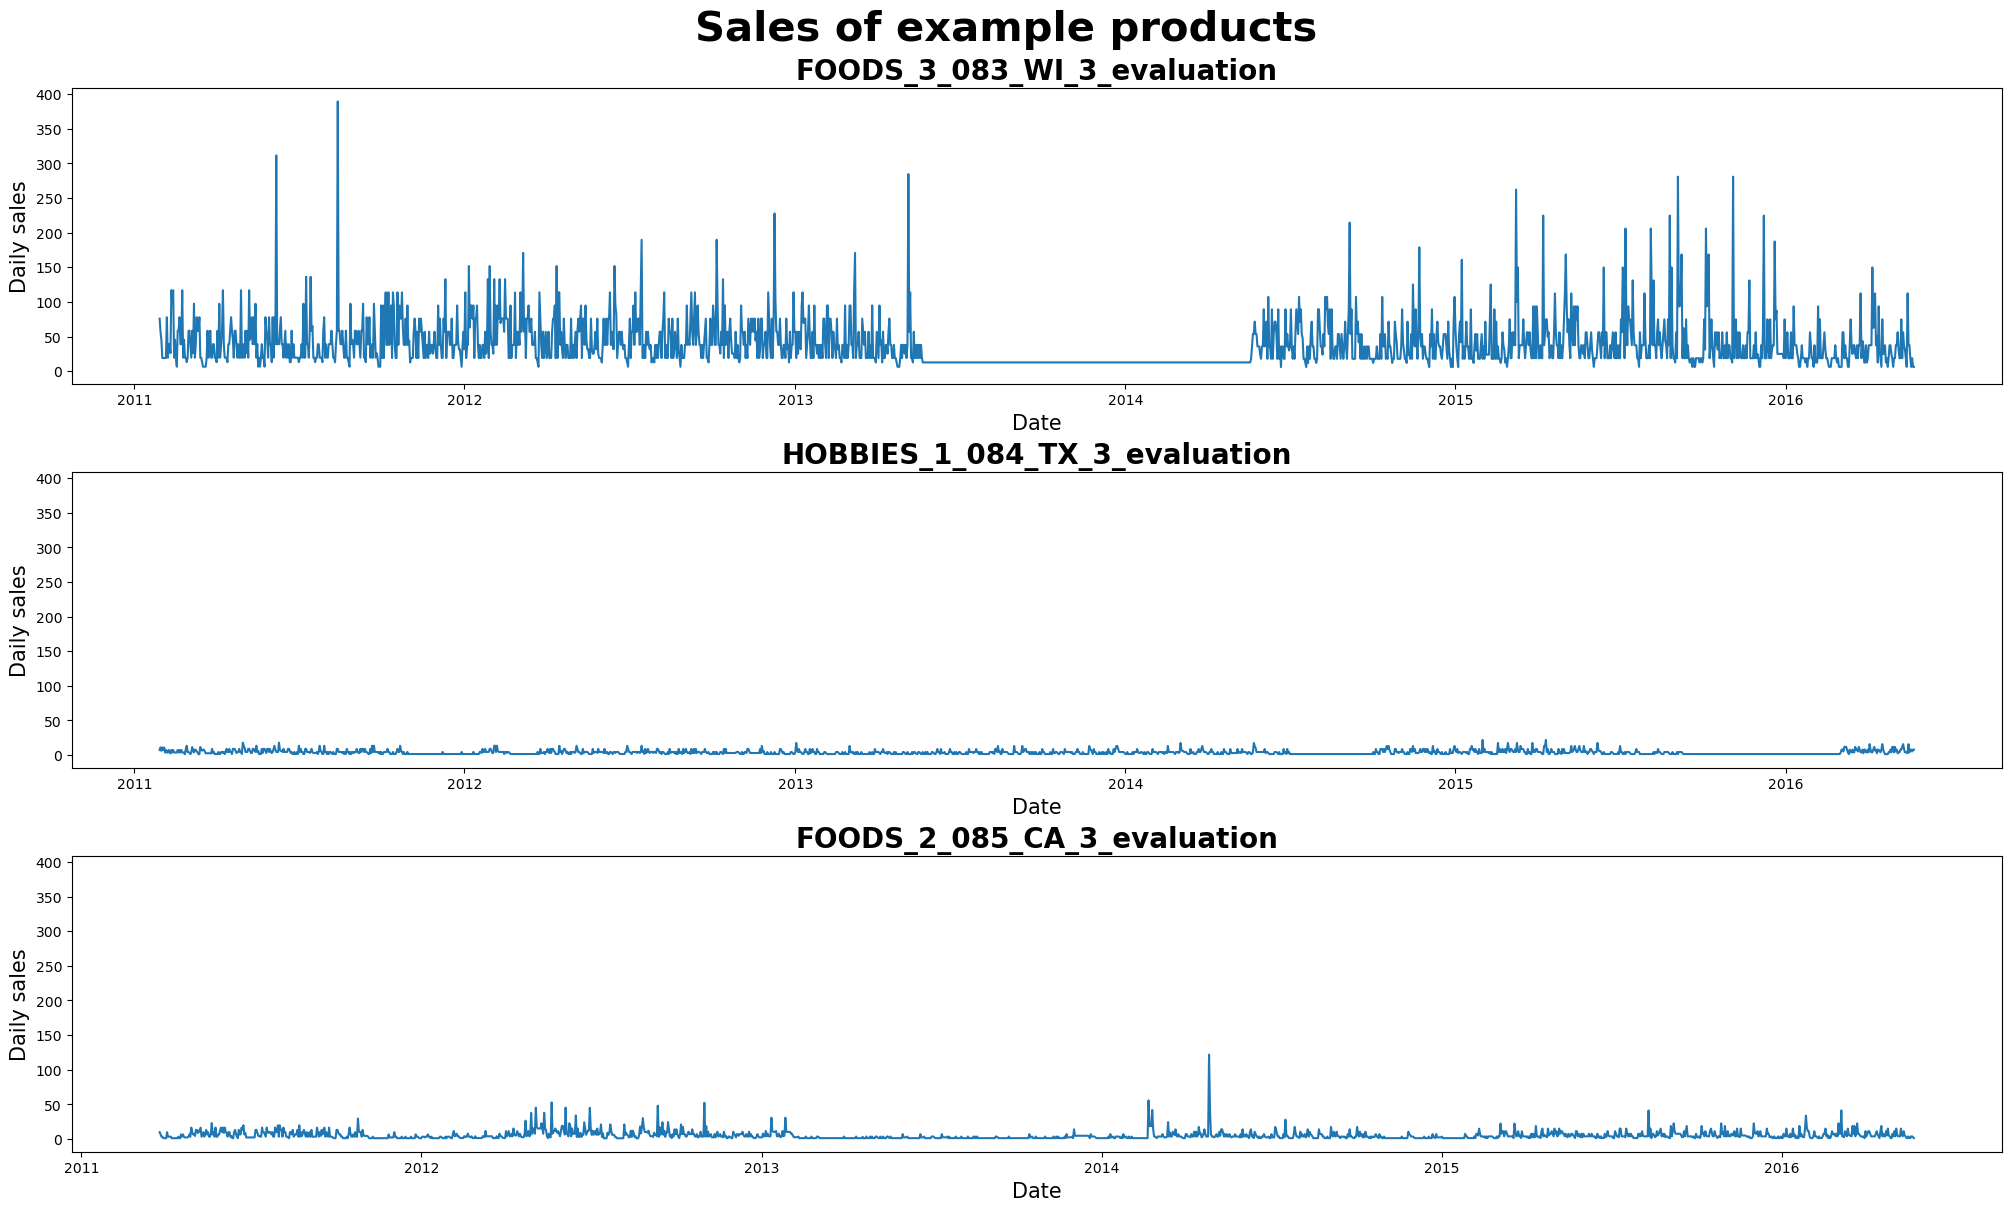

In [16]:

#Plot 3 example items
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_TX_3_evaluation', 'FOODS_2_085_CA_3_evaluation']

fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales of example products', fontsize = 30, weight = 'bold')

for i in range(0,len(multi_items)):
    
    graph_item = sns.lineplot(x = "date", y = 'daily_sell_mod', data = test_df[['date','daily_sell_mod']].loc[test_df['id'] ==  multi_items[i]], 
                 ax = ax[i]) 
    graph_item.set_title(multi_items[i], size = 20, weight = 'bold')
    graph_item.set_ylabel("Daily sales", fontsize=15)
    graph_item.set_xlabel("Date", fontsize=15)


In [17]:
single_df = test_df.loc[test_df['id'] == 'FOODS_3_083_WI_3_evaluation',['date','daily_sell']].set_index('date')
single_df_mod = test_df.loc[test_df['id'] == 'FOODS_3_083_WI_3_evaluation',['date','daily_sell_mod']].set_index('date')


## Decomposition


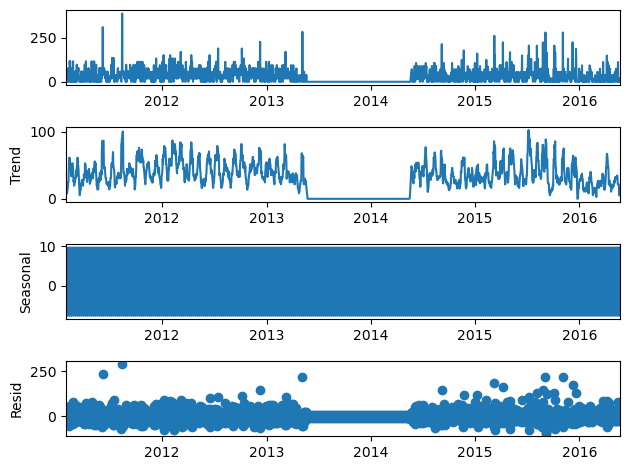

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decom = seasonal_decompose(single_df, model = "add", period=7)
decom.plot();

## Stationary

In [21]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(table, mean_window, var_window, title):
    
    #Plot rolling statistic:
    dim = (30,7)
    plt.subplots(figsize = dim)
    
    moving_mean = table.rolling(window=mean_window).mean()
    moving_std = table.rolling(window=var_window).std()
    
    original = plt.plot(table, color = 'blue', label = 'Original')
    mean = plt.plot(moving_mean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(moving_std, color = 'black', label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title("Rolling mean and STD" + title, fontsize = 25)
    plt.show(block = False)
    
    result = adfuller(table, autolag = 'AIC')
    labels = ['ADF Test Static', 'p-value', '# of Legs used', 'Number of Observation Used']
    print('Dickey-Fuller Test: ')
    adf_out = pd.Series(result[0:4], index = labels)
#     for value, label in zip(result,labels):
#         print(label + ': ' + str(value))
       
    
    for key, value in result[4].items():
        adf_out['Critical Value (%s)' %key] = value
    print(adf_out) 
    if(result[1] <= 0.05):
        print('Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary')
    else:
        print('Weak evidence against the null hypothesis. Accept the null hypothesis. Time Series has a unit root, indicating it is non-stationary')    

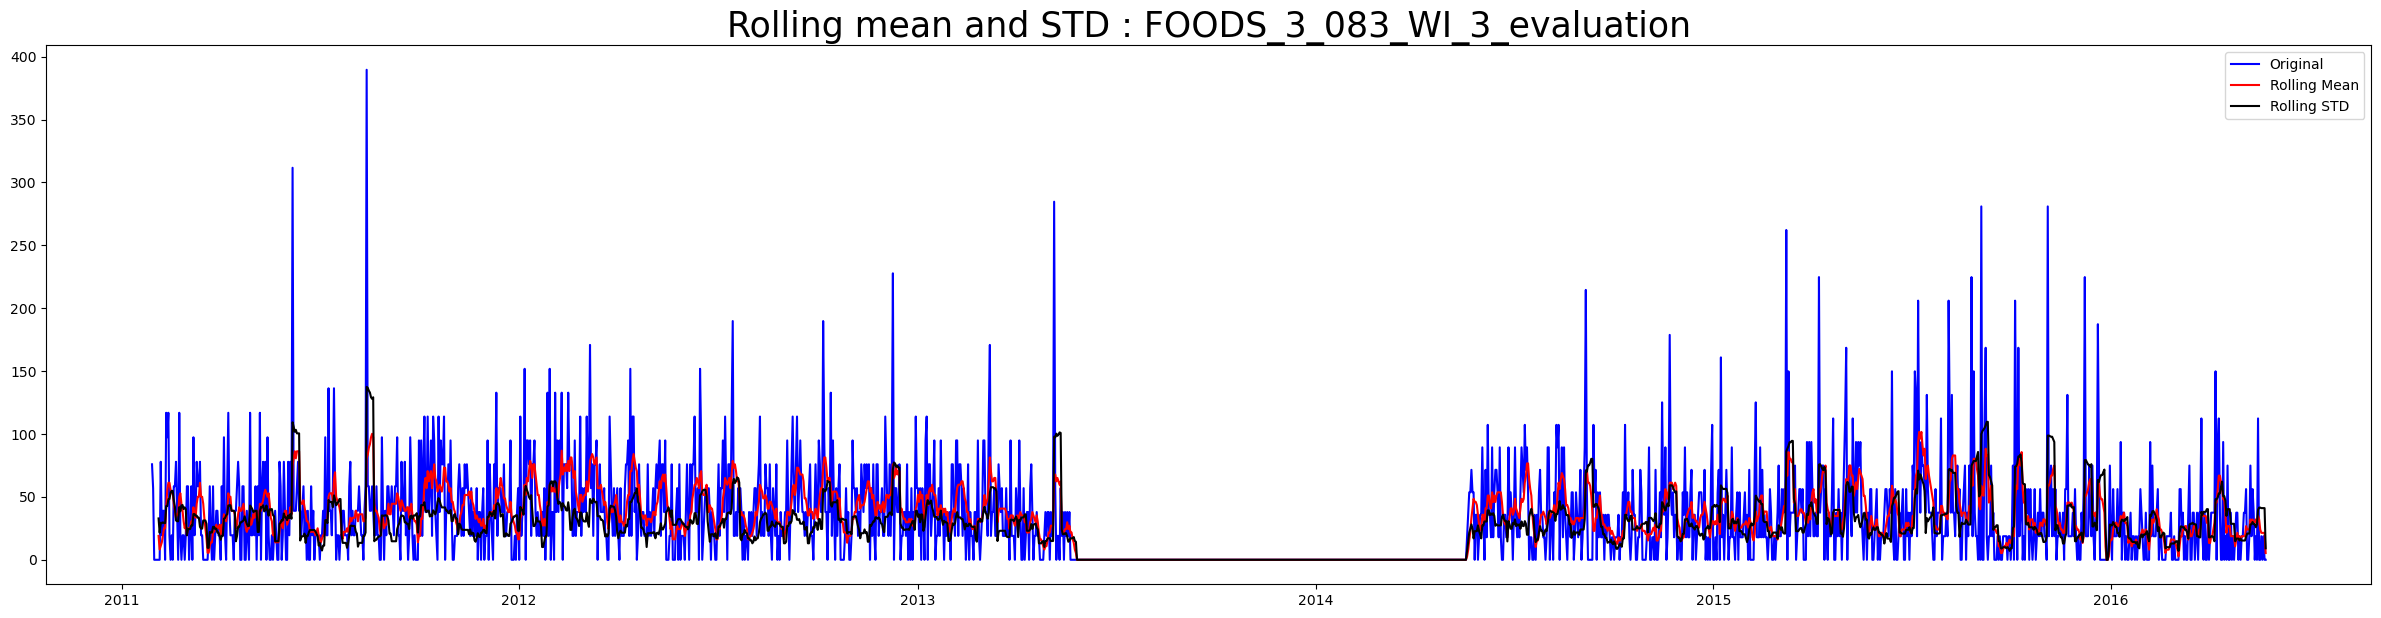

Dickey-Fuller Test: 
ADF Test Static                 -3.621516
p-value                          0.005363
# of Legs used                  26.000000
Number of Observation Used    1914.000000
Critical Value (1%)             -3.433771
Critical Value (5%)             -2.863051
Critical Value (10%)            -2.567575
dtype: float64
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [22]:
#For Rolling statistic, the window will be 7 since this is daily frequency data
test_stationary(single_df, 7, 7, " : FOODS_3_083_WI_3_evaluation")

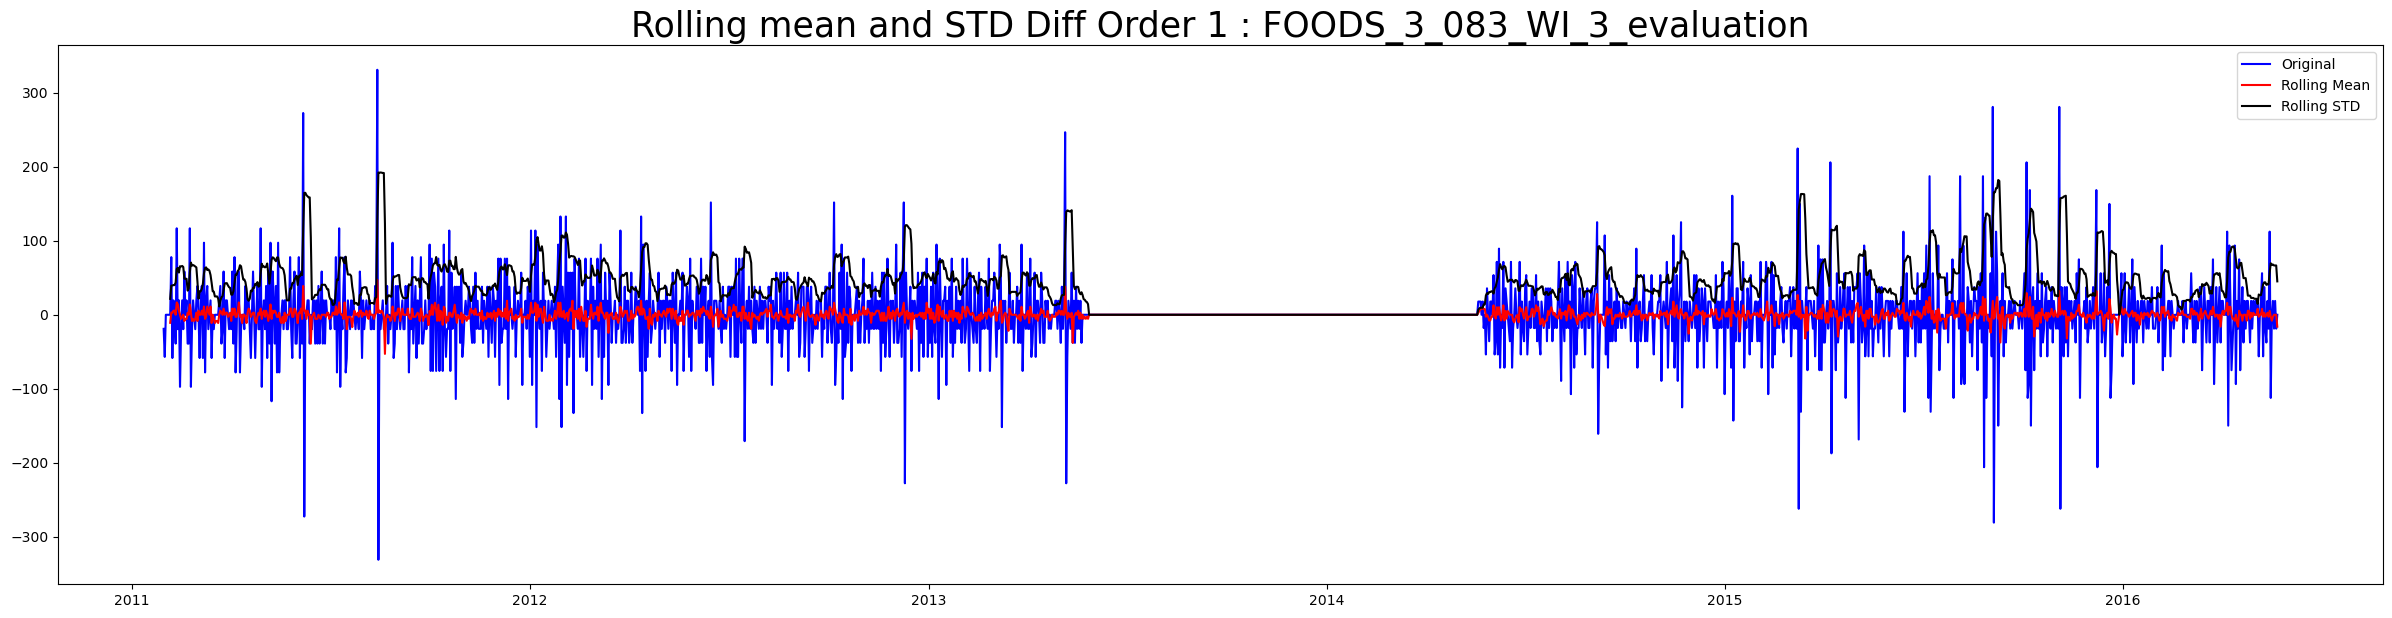

Dickey-Fuller Test: 
ADF Test Static              -1.701619e+01
p-value                       8.521376e-30
# of Legs used                2.600000e+01
Number of Observation Used    1.913000e+03
Critical Value (1%)          -3.433773e+00
Critical Value (5%)          -2.863052e+00
Critical Value (10%)         -2.567575e+00
dtype: float64
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [23]:
#Apply Differential order to the time series and analyze the stationarity characteristics
single_df_diff = single_df - single_df.shift(1)
single_df_diff.dropna(inplace = True)
test_stationary(single_df_diff, 7, 7, " Diff Order 1 : FOODS_3_083_WI_3_evaluation")

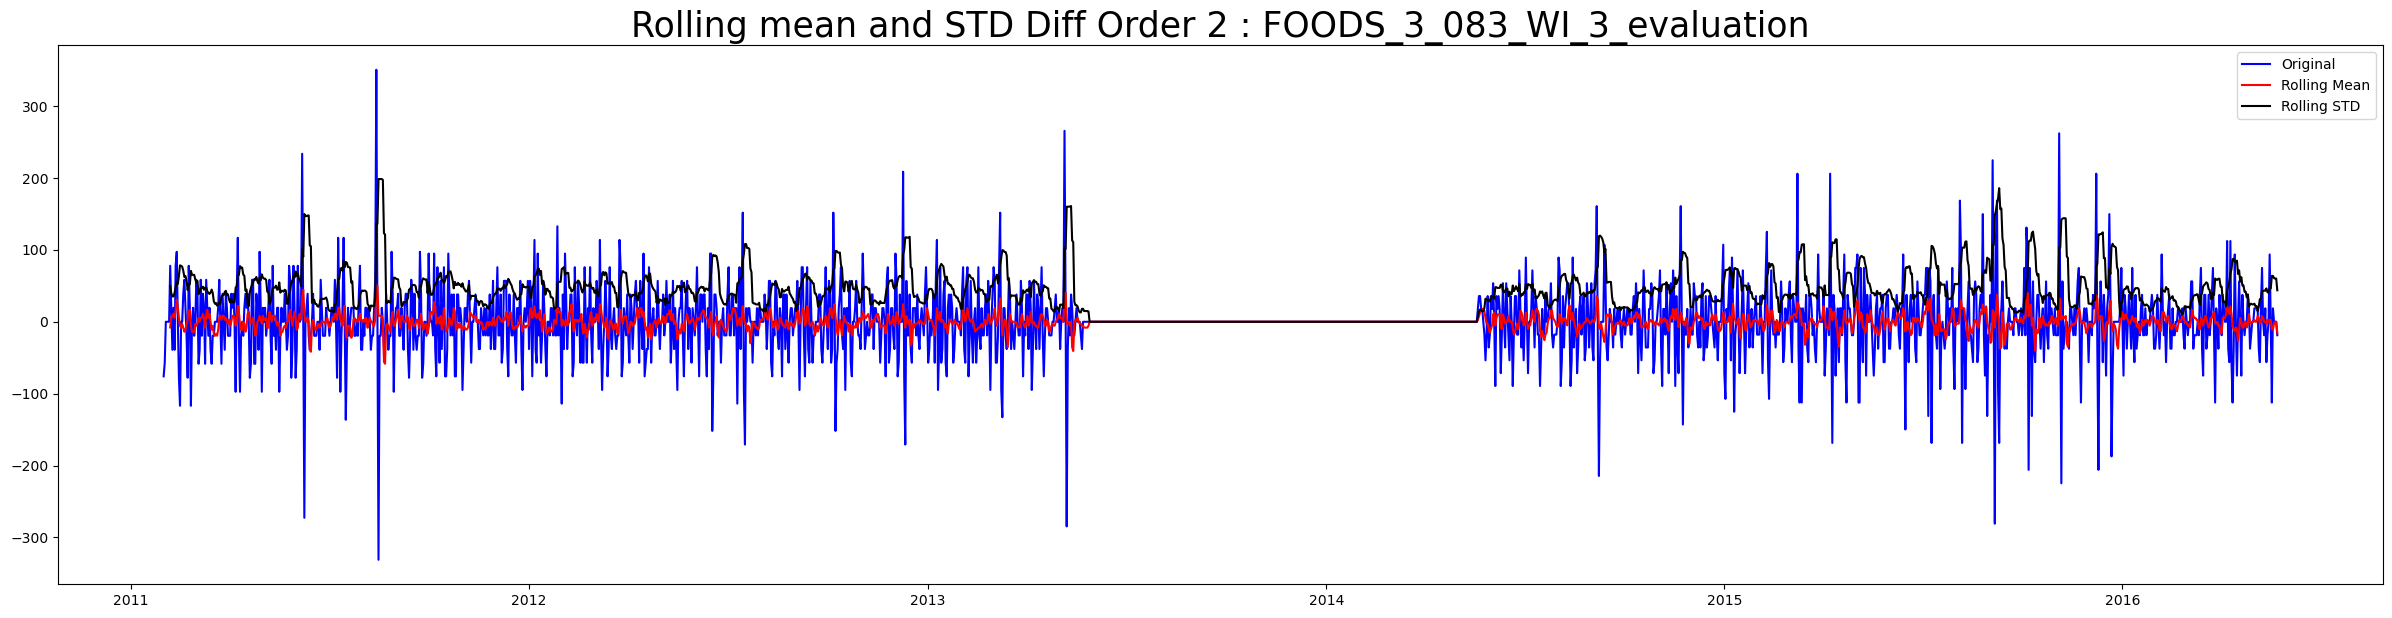

Dickey-Fuller Test: 
ADF Test Static              -1.744605e+01
p-value                       4.680694e-30
# of Legs used                2.500000e+01
Number of Observation Used    1.913000e+03
Critical Value (1%)          -3.433773e+00
Critical Value (5%)          -2.863052e+00
Critical Value (10%)         -2.567575e+00
dtype: float64
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [24]:
#Apply Differential order to the time series and analyze the stationarity characteristics
single_df_diff2 = single_df - single_df.shift(2)
single_df_diff2.dropna(inplace = True)
test_stationary(single_df_diff2, 7, 7, " Diff Order 2 : FOODS_3_083_WI_3_evaluation")

Stronger stationary was found with differentiate order 2, but lost many peaks

## Autocorrelation of the graph (ACF) and Partial Autocorrelation Function (PACF)

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

def acf_pacf_graph(table,title = '', lag_max = 35):

    fig,ax =  plt.subplots(nrows= 2, ncols=1, figsize = ( 10, 7), constrained_layout=True, sharey=True) 
    fig.suptitle('ACF and PACF' + title, fontsize = 20, weight = 'bold')
    
    plot_acf(table, lags=lag_max, ax = ax[0]) 
    ax[0].set_title("ACF", fontsize = 15, weight = 'bold')
    ax[0].set_xlabel("Lag", fontsize=12)
    ax[0].set_ylabel("ACF", fontsize=12)
    plot_pacf(single_df_diff, lags=lag_max, method = "ols", ax = ax[1]) 
    ax[1].set_title('PACF', fontsize = 15, weight = 'bold')
    ax[1].set_xlabel("Lag", fontsize=12)
    ax[1].set_ylabel("PACF", fontsize=12)

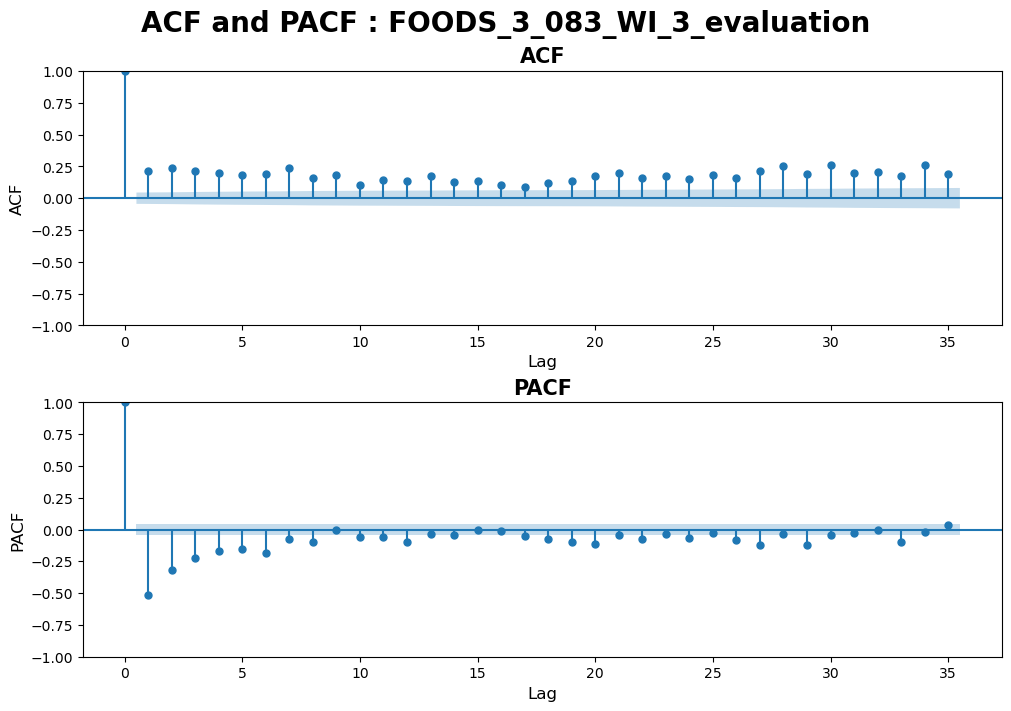

In [28]:
acf_pacf_graph(single_df,' : FOODS_3_083_WI_3_evaluation' )

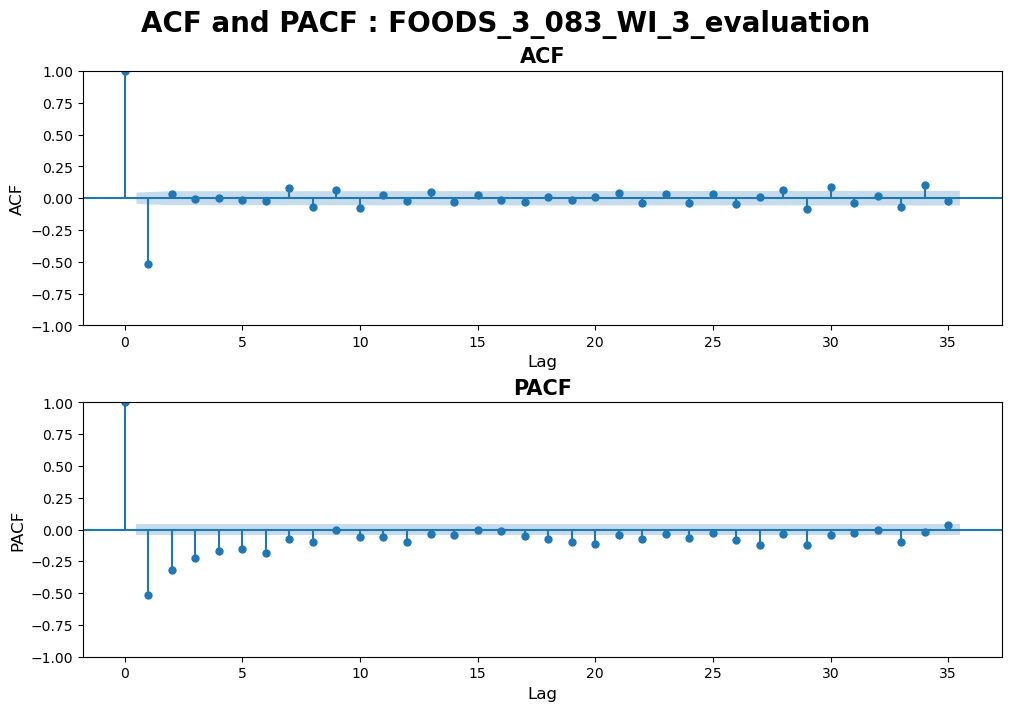

In [29]:
acf_pacf_graph(single_df_diff,' : FOODS_3_083_WI_3_evaluation' )

Parameter p for AR(p) : 0 Geometric decay at PACF \
Parameter q for MA(q) : 1 High negative correlation at lag 1 \
Difference parameter (d) is set to: 1

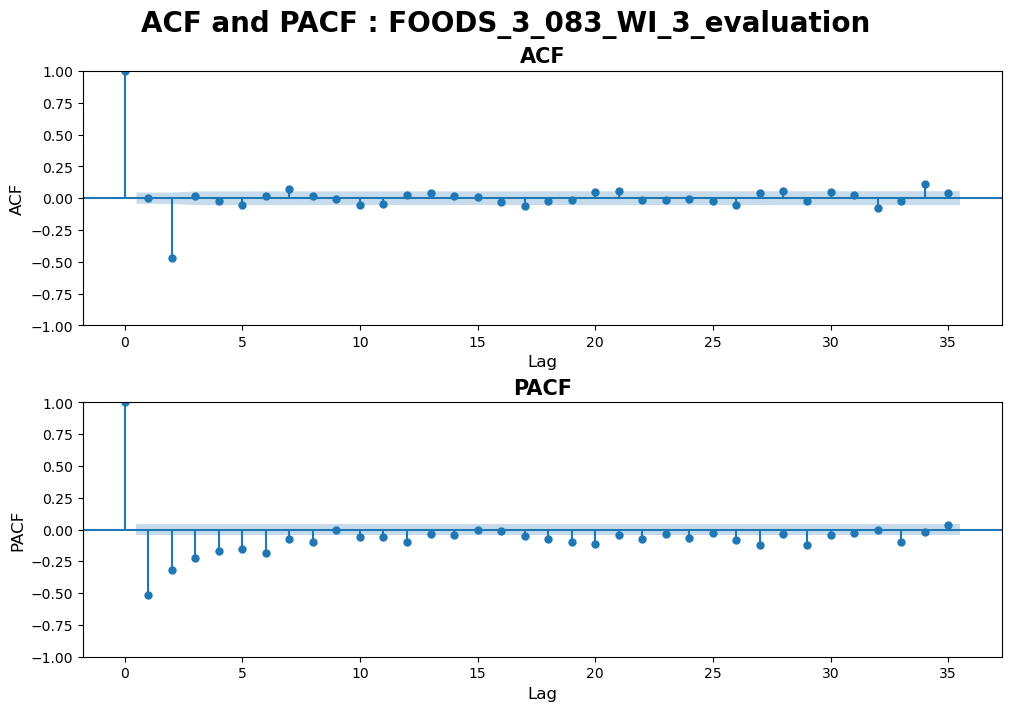

In [31]:
acf_pacf_graph(single_df_diff2,' : FOODS_3_083_WI_3_evaluation' )

Parameter p for AR(p) : 0 Geometric decay at PACF \
Parameter q for MA(q) : 2 High negative correlation at lag 2 \
Difference parameter (d) is set to: 2

## Split the data into train and test

In [34]:
def test_train_split_arima(table, product, target = 'daily_sell', test_size = 30, max_date = 1941):
    Y_train = table.loc[(table['id'] == product) & (table['day'] <= (max_date - test_size)) , ['date',target]].set_index('date')
    Y_test = table.loc[(table['id'] == product) & (table['day'] > (max_date - test_size)) , ['date',target]].set_index('date')
    
    return Y_train, Y_test

In [130]:
y_train, y_test = test_train_split_arima(test_df,'FOODS_3_083_WI_3_evaluation')

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [37]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [38]:
def APE(Y_actual, Y_Predicted):
    ape = np.abs((Y_actual - Y_Predicted)/Y_actual)
    return ape

In [114]:
def RMSE(Y_actual, Y_Predicted):
    rmse = np.sqrt(mean_squared_error(Y_actual, Y_Predicted.dropna()))
    return rmse

### ARIMA

In [323]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(endog = single_df, order=(8,1,0))
model2 = ARIMA(endog = single_df, order=(8,2,0))
model_fit = model.fit()
model_fit2 = model2.fit()
predict = model_fit.predict(start = '2016-04-22', end = '2016-05-22', typ ='levels')
predict2 = model_fit2.predict(start = '2016-04-22', end = '2016-05-22', typ ='levels')

# summary of fit model
print(model_fit.summary())
print(model_fit.resid.describe())

print(model_fit2.summary())
print(model_fit2.resid.describe())

C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

                               SARIMAX Results                                
Dep. Variable:             daily_sell   No. Observations:                 1941
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -9738.405
Date:                Fri, 26 Apr 2024   AIC                          19494.810
Time:                        21:39:32   BIC                          19544.943
Sample:                    01-29-2011   HQIC                         19513.246
                         - 05-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8666      0.020    -43.345      0.000      -0.906      -0.827
ar.L2         -0.7080      0.026    -26.937      0.000      -0.760      -0.656
ar.L3         -0.5885      0.029    -20.211      0.0

In [335]:
cal_mape1 = MAPE(y_test['daily_sell'], predict)
cal_mape2 = MAPE(y_test, predict2)
print("MAPE: ",cal_mape1)
print("MAPE: ",cal_mape2)

MAPE:  inf
MAPE:  nan


In [337]:
y_test

daily_sell
date                  
2016-04-23        0.00
2016-04-24       18.73
2016-04-25       37.46
2016-04-26       37.46
2016-04-27        0.00
2016-04-28       18.73
2016-04-29        0.00
2016-04-30       18.73
2016-05-01       18.73
2016-05-02       37.46
2016-05-03       37.46
2016-05-04       56.19
2016-05-05        0.00
2016-05-06        0.00
2016-05-07       18.73
2016-05-08       74.92
2016-05-09       18.73
2016-05-10       56.19
2016-05-11       37.46
2016-05-12        0.00
2016-05-13       18.73
2016-05-14        0.00
2016-05-15      112.38
2016-05-16        0.00
2016-05-17        0.00
2016-05-18       18.73
2016-05-19        0.00
2016-05-20       18.73
2016-05-21        0.00
2016-05-22        0.00

In [154]:
table.loc[(table['id'] == 'FOODS_3_083_WI_3_evaluation') & (table['day'] > (max_date - test_size)) , ['date',target]].set_index('date')
cal_rsme = np.sqrt(mean_squared_error(single_test['FOODS_3_083_WI_3_evaluation'], single['predict_arma'].dropna()))
print("RSME: ", cal_rsme)
cal_mape = MAPE(single_test['FOODS_3_083_WI_3_evaluation'], single['predict_arma'])
print("MAPE: ",cal_mape)

NameError: name 'table' is not defined

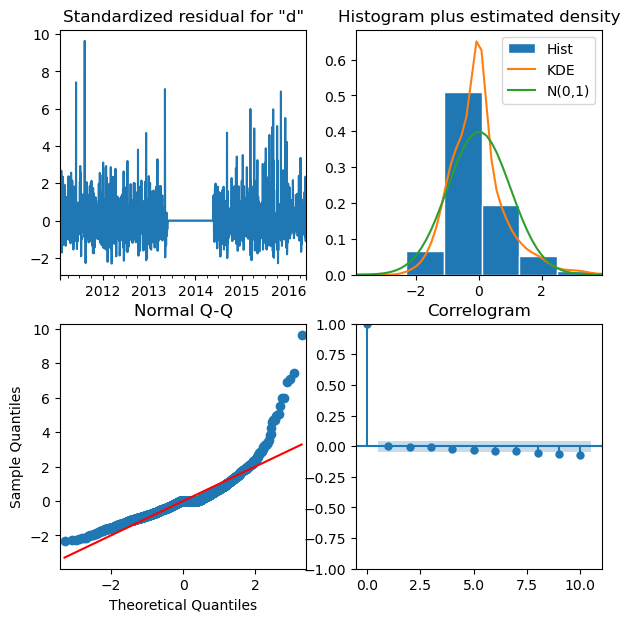

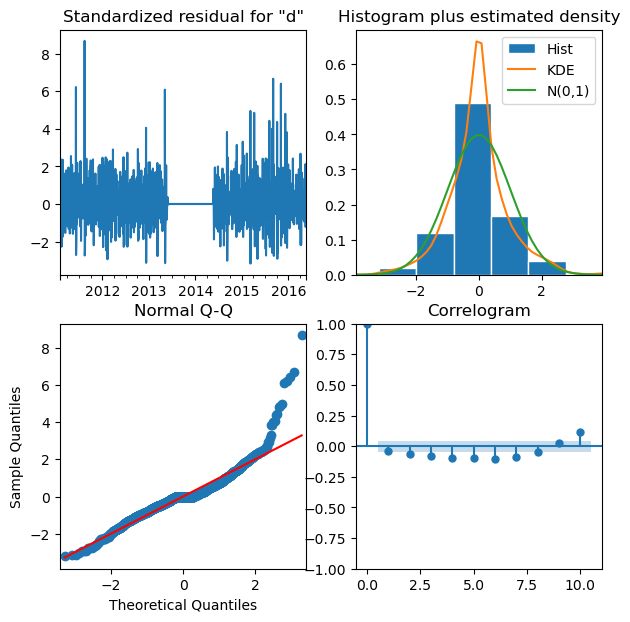

In [176]:
model_fit.plot_diagnostics(figsize = (7,7))
model_fit2.plot_diagnostics(figsize = (7,7))
plt.show()

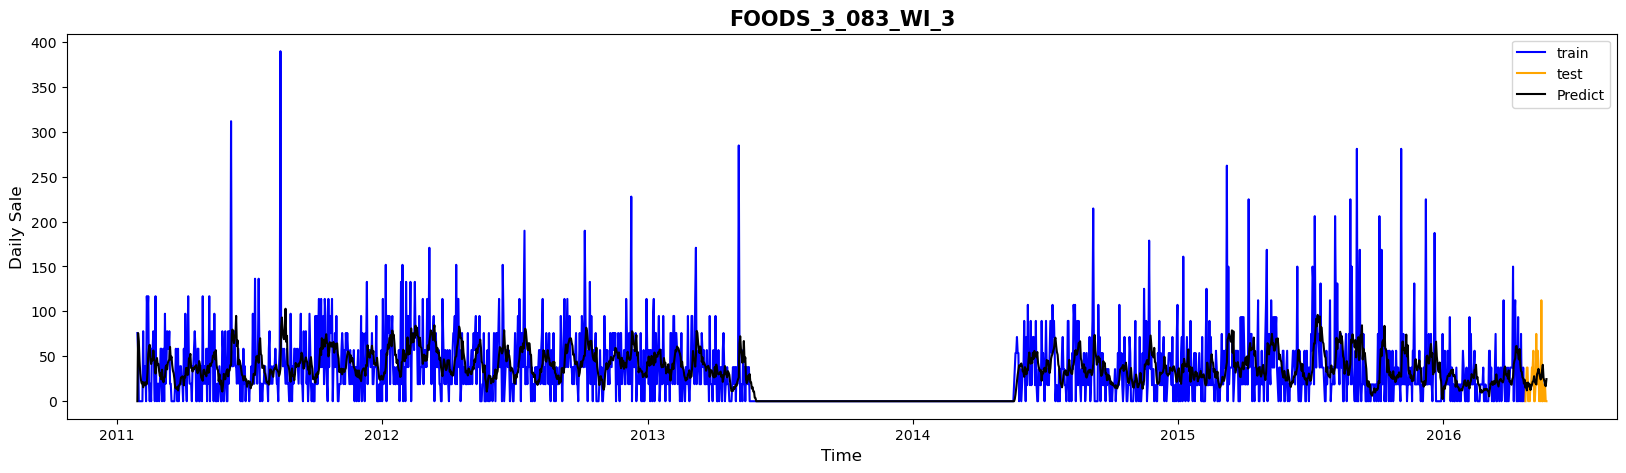

In [172]:
size = (20, 5)
plt.figure(figsize=size)
train = plt.plot(y_train, color = 'blue', label = 'train')
test = plt.plot(y_test['daily_sell'], color = 'orange', label = 'test')
predicted = plt.plot(predict, color = 'black', label = 'Predict')
plt.legend(loc = 'best')
plt.title("FOODS_3_083_WI_3", fontsize = 15, weight = 'bold')
plt.ylabel("Daily Sale", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.show()

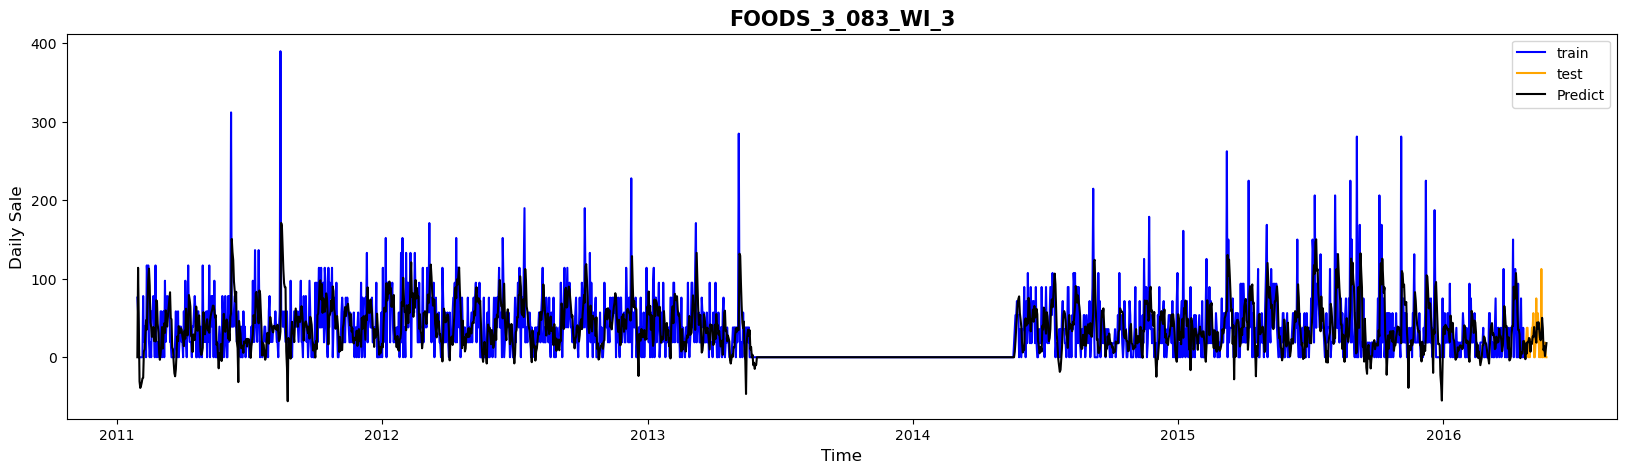

In [174]:
size = (20, 5)
plt.figure(figsize=size)
train = plt.plot(y_train, color = 'blue', label = 'train')
test = plt.plot(y_test['daily_sell'], color = 'orange', label = 'test')
predicted = plt.plot(predict2, color = 'black', label = 'Predict')
plt.legend(loc = 'best')
plt.title("FOODS_3_083_WI_3", fontsize = 15, weight = 'bold')
plt.ylabel("Daily Sale", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.show()

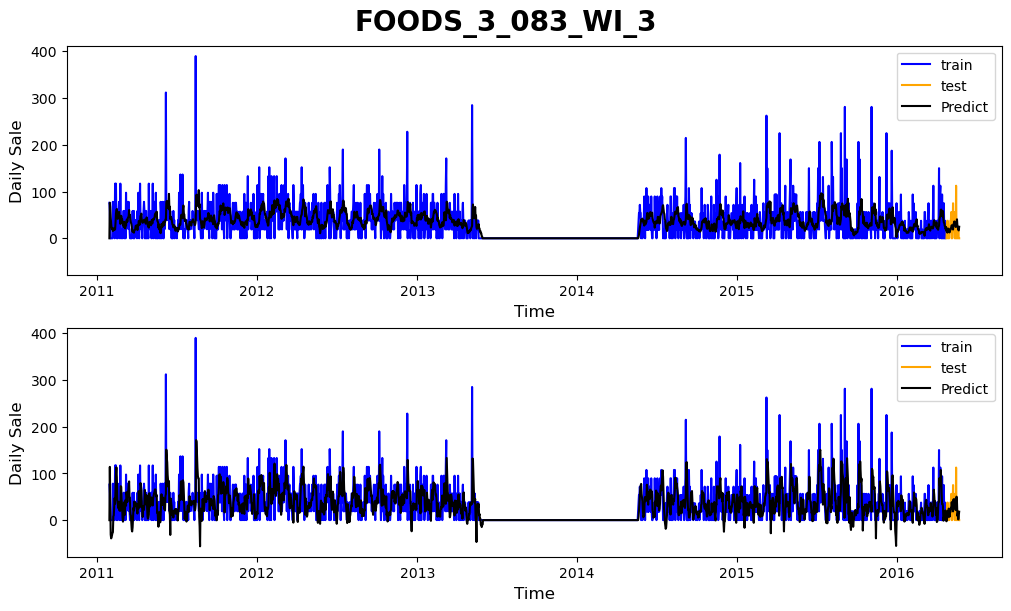

In [224]:
fig,ax =  plt.subplots(nrows= 2, ncols=1, figsize = ( 10, 6), constrained_layout=True, sharey=True) 
fig.suptitle('FOODS_3_083_WI_3' , fontsize = 20, weight = 'bold')


ax[0].plot(y_train, color = 'blue', label = 'train')
ax[0].plot(y_test['daily_sell'], color = 'orange', label = 'test')
ax[0].plot(predict, color = 'black', label = 'Predict')
ax[0].legend(loc = 'best')
ax[0].set_ylabel("Daily Sale", fontsize=12)
ax[0].set_xlabel("Time", fontsize=12)

ax[1].plot(y_train, color = 'blue', label = 'train')
ax[1].plot(y_test['daily_sell'], color = 'orange', label = 'test')
ax[1].plot(predict2, color = 'black', label = 'Predict')
ax[1].legend(loc = 'best')
ax[1].set_ylabel("Daily Sale", fontsize=12)
ax[1].set_xlabel("Time", fontsize=12)
plt.show()

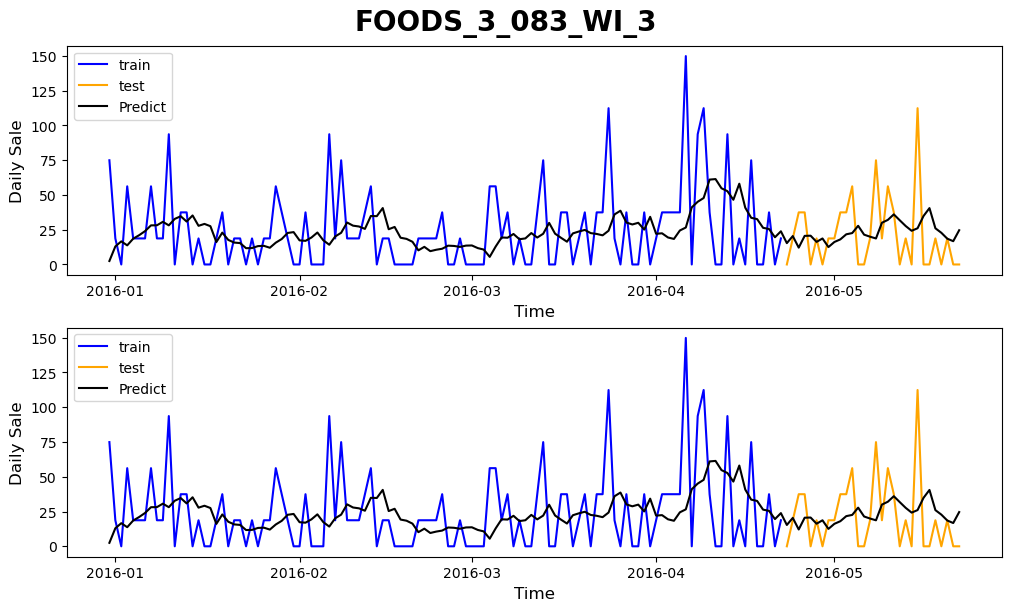

In [222]:
fig,ax =  plt.subplots(nrows= 2, ncols=1, figsize = ( 10, 6), constrained_layout=True, sharey=True) 
fig.suptitle('FOODS_3_083_WI_3' , fontsize = 20, weight = 'bold')
y_train_limit = y_train.loc['2015-12-31':].copy()
predict_limit = predict.loc['2015-12-31':].copy()
ax[0].plot(y_train_limit, color = 'blue', label = 'train')
ax[0].plot(y_test['daily_sell'], color = 'orange', label = 'test')
ax[0].plot(predict_limit, color = 'black', label = 'Predict')
ax[0].legend(loc = 'best')
ax[0].set_ylabel("Daily Sale", fontsize=12)
ax[0].set_xlabel("Time", fontsize=12)

ax[1].plot(y_train_limit, color = 'blue', label = 'train')
ax[1].plot(y_test['daily_sell'], color = 'orange', label = 'test')
ax[1].plot(predict_limit, color = 'black', label = 'Predict')
ax[1].legend(loc = 'best')
ax[1].set_ylabel("Daily Sale", fontsize=12)
ax[1].set_xlabel("Time", fontsize=12)
plt.show()

In [216]:
predict.head()

2011-01-29     0.000000
2011-01-30    75.827068
2011-01-31    66.699824
2011-02-01    44.658210
2011-02-02    30.991848
Freq: D, Name: predicted_mean, dtype: float64

In [251]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(endog = single_df, order=(8,1,0))
model2 = ARIMA(endog = single_df, order=(8,2,0))
model_fit = model.fit()
model_fit2 = model2.fit()
predict = model_fit.get_forecast(steps=len(y_test))
predict2 = model_fit2.get_forecast(steps=len(y_test))
#start = '2016-04-22', end = '2016-05-22',

forecast_series = pd.Series(predict.predicted_mean, index=y_test.index)
forecast_series2 = pd.Series(predict2.predicted_mean, index=y_test.index)

# summary of fit model
print(model_fit.summary())
print(model_fit.resid.describe())

print(model_fit2.summary())
print(model_fit2.resid.describe())

C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

                               SARIMAX Results                                
Dep. Variable:             daily_sell   No. Observations:                 1941
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -9738.405
Date:                Fri, 26 Apr 2024   AIC                          19494.810
Time:                        21:04:19   BIC                          19544.943
Sample:                    01-29-2011   HQIC                         19513.246
                         - 05-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8666      0.020    -43.345      0.000      -0.906      -0.827
ar.L2         -0.7080      0.026    -26.937      0.000      -0.760      -0.656
ar.L3         -0.5885      0.029    -20.211      0.0

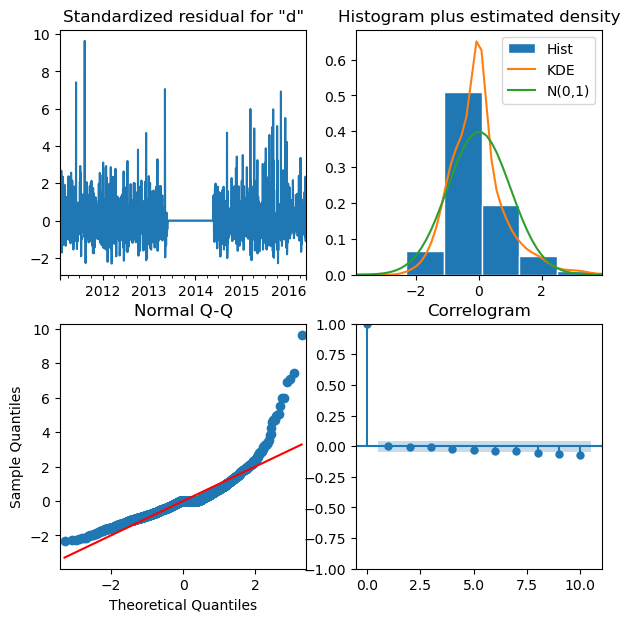

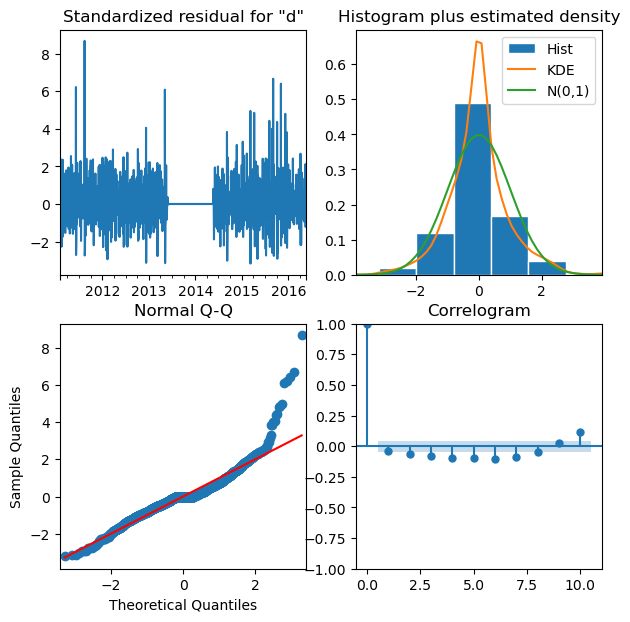

In [255]:
model_fit.plot_diagnostics(figsize = (7,7))
model_fit2.plot_diagnostics(figsize = (7,7))
plt.show()

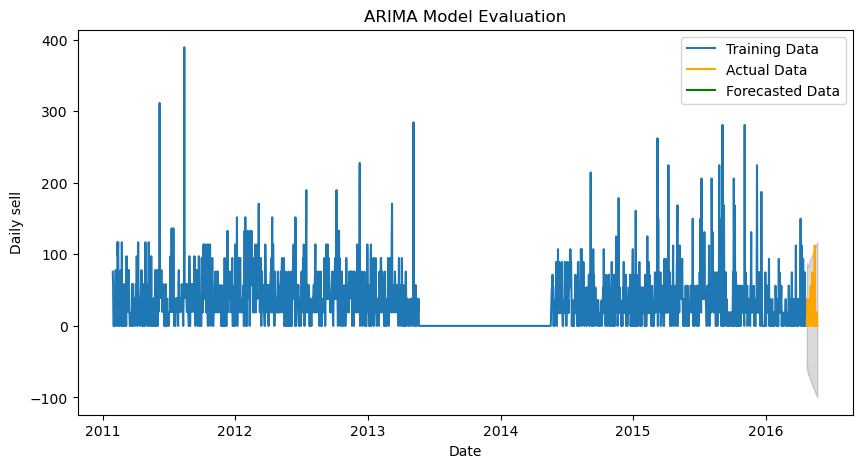

In [263]:
plt.figure(figsize=(10,5))
plt.plot(y_train['daily_sell'], label='Training Data')
plt.plot(y_test['daily_sell'], label='Actual Data', color='orange')
plt.plot(forecast_series, label='Forecasted Data', color='green')
plt.fill_between(y_test.index, 
                 predict.conf_int().iloc[:, 0], 
                 predict.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Daily sell')
plt.legend()
plt.show()

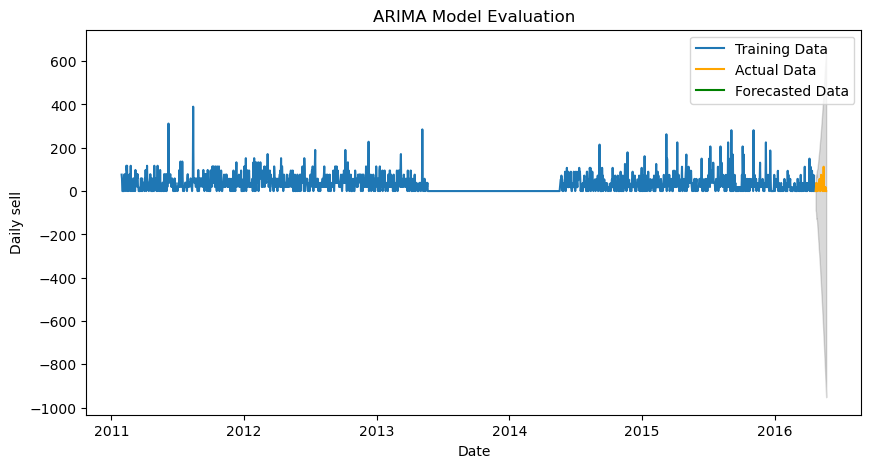

In [265]:
plt.figure(figsize=(10,5))
plt.plot(y_train['daily_sell'], label='Training Data')
plt.plot(y_test['daily_sell'], label='Actual Data', color='orange')
plt.plot(forecast_series2, label='Forecasted Data', color='green')
plt.fill_between(y_test.index, 
                 predict2.conf_int().iloc[:, 0], 
                 predict2.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Daily sell')
plt.legend()
plt.show()

### SARIMAX

In [ ]:
# #Apply Differential order to the time series and analyze the stationarity characteristics
# single_df_season_diff = single_df - single_df.shift(7)
# single_df_season_diff.dropna(inplace = True)
# test_stationary(single_df_season_diff, 7, 7, " Seasonal 1st Diff : FOODS_3_083_WI_3")

In [ ]:
# #Apply Differential order to the time series and analyze the stationarity characteristics
# single_df_season_diff_d1 = single_df - single_df.shift(7) - single_df.shift(1)
# single_df_season_diff_d1.dropna(inplace = True)
# test_stationary(single_df_season_diff_d1, 7, 7, " Seasonal Diff and 1st diff : FOODS_3_083_WI_3")

In [ ]:
# #Apply Differential order to the time series and analyze the stationarity characteristics
# single_df_season_diff2 = single_df - single_df.shift(7) - single_df.shift(7)
# single_df_season_diff2.dropna(inplace = True)
# test_stationary(single_df_season_diff2, 7, 7, " Seasonal 2nd Diff : FOODS_3_083_WI_3")

In [ ]:
# acf_pacf_graph(single_df_season_diff,' Seasonal Diff : FOODS_3_083_WI_3' )

(0,0,3)x(0,1,1)
Seasonal Parameters: \
Parameter P for AR(D) : 0 Geometric decay at PACF \
Parameter Q for MA(Q) : 1 High negative correlation at lag 7 \
Difference parameter (D) is set to: 1 \
Non-Seasonal Parameters:\
Parameter p for AR(p) : 0 Geometric decay at PACF \
Parameter q for MA(q) : 3 \
Difference parameter (d) is set to: 0
We can see the spikes at lag 1,2 3 before lag 7, so it seems there is non-seasonal MA3

In [271]:
# dtype_dict_sarima = [
#     'item_id',
#     'dept_id',
#     'cat_id',
#     'store_id',
#     'state_id',
#     'wm_yr_wk',
#     'wday',
#     'month',
#     'year',
#     'snap_CA',
#     'snap_WI',
#     'snap_TX',
#     'is_weekend',
#     'events_per_day',
#     'month_day',
#     'week_number'
# ]


def test_train_split_sarima(table, product, test_size = 30, max_date = 1941):
    
    Y_train = table.loc[(table['id'] == product) & (table['day'] <= (max_date - test_size)), ['date','daily_sell']].set_index('date')
    Y_exog = table.loc[(table['id'] == product) & (table['day'] <= (max_date - test_size))].set_index('date')
    Y_test = table.loc[(table['id'] == product) & (table['day'] > (max_date - test_size)), ['date','daily_sell']].set_index('date')
    
    Y_exog = Y_exog.drop(['id','daily_sell'], axis = 1)
    
    return Y_train, Y_test, Y_exog


In [365]:
def test_train_split_sarima_mod(table, product, test_size = 30, max_date = 1941):
    
    Y_train = table.loc[(table['id'] == product) & (table['day'] <= (max_date - test_size)), ['date','daily_sell_mod']].set_index('date')
    Y_exog = table.loc[(table['id'] == product) & (table['day'] <= (max_date - test_size))].set_index('date')
    Y_test = table.loc[(table['id'] == product) & (table['day'] > (max_date - test_size)), ['date','daily_sell_mod']].set_index('date')
    
    Y_exog = Y_exog.drop(['id','daily_sell_mod'], axis = 1)
    
    return Y_train, Y_test, Y_exog

In [273]:
y_train, y_test, y_exog = test_train_split_sarima(df,'FOODS_3_083_WI_3_evaluation')

In [275]:
y_exog.columns

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'sell_quantity',
       'wm_yr_wk', 'wday', 'month', 'year', 'event_name_1', 'event_type_1',
       'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'day',
       'is_weekend', 'month_day', 'week_number', 'events_per_day',
       'sell_price', 'lag_1', 'lag_2', 'lag_3', 'lag_7', 'lag_14', 'lag_21',
       'lag_28', 'lag_35', 'lag_42', 'lag_49', 'rolling_median_7',
       'rolling_median_14', 'rolling_median_28', 'rolling_median_35',
       'rolling_median_42', 'rolling_median_49', 'rolling_median_56',
       'rolling_std_7', 'rolling_std_14', 'rolling_std_28', 'rolling_std_35',
       'rolling_std_42', 'rolling_std_49', 'rolling_std_56'],
      dtype='object')

In [285]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_exog = ARIMA(endog = y_train.loc[:, 'daily_sell'], order=(8,1,0), exog = y_exog)
model_exog_fit = model.fit()
predict_exog= model_exog_fit.predict(typ ='levels')
#start = '2016-04-22', end = '2016-05-22',
# summary of fit model
print(model_exog_fit.summary())

print(model_exog_fit.resid.describe())

C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             daily_sell   No. Observations:                 1941
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -9738.405
Date:                Fri, 26 Apr 2024   AIC                          19494.810
Time:                        21:10:10   BIC                          19544.943
Sample:                    01-29-2011   HQIC                         19513.246
                         - 05-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8666      0.020    -43.345      0.000      -0.906      -0.827
ar.L2         -0.7080      0.026    -26.937      0.000      -0.760      -0.656
ar.L3         -0.5885      0.029    -20.211      0.0

In [ ]:
table.loc[(table['id'] == 'FOODS_3_083_WI_3_evaluation') & (table['day'] > (max_date - test_size)) , ['date',target]].set_index('date')
cal_rsme = np.sqrt(mean_squared_error(single_test['FOODS_3_083_WI_3_evaluation'], single['predict_arma'].dropna()))
print("RSME: ", cal_rsme)
cal_mape = MAPE(single_test['FOODS_3_083_WI_3_evaluation'], single['predict_arma'])
print("MAPE: ",cal_mape)

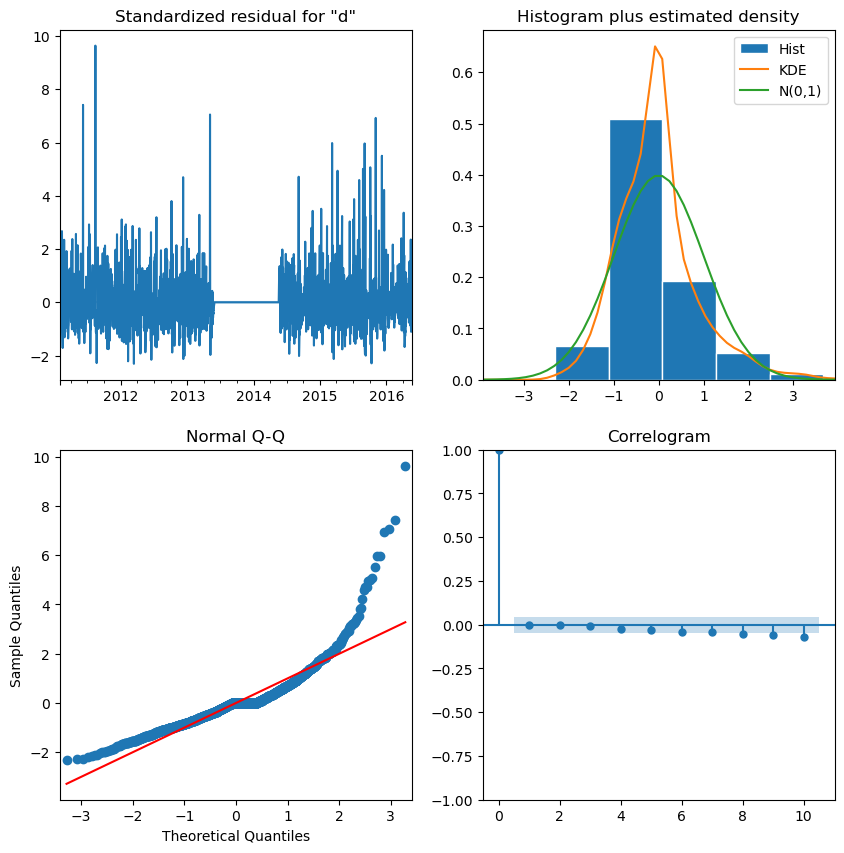

In [279]:
model_exog_fit.plot_diagnostics(figsize = (10,10))
plt.show()


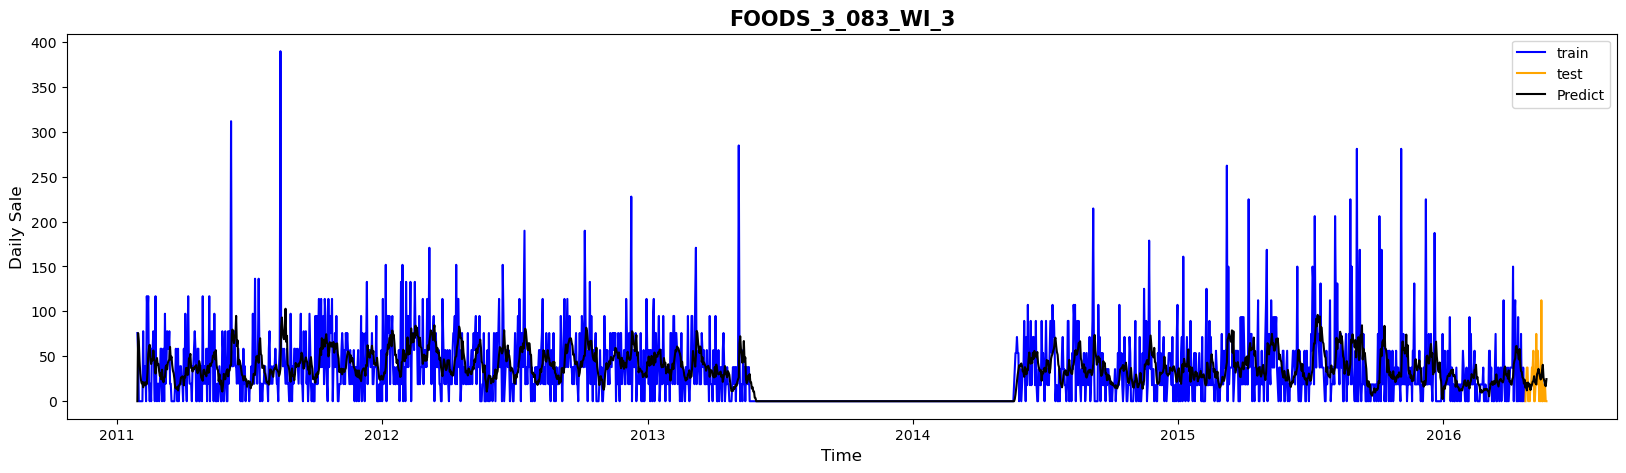

In [281]:
size = (20, 5)
plt.figure(figsize=size)
train = plt.plot(y_train, color = 'blue', label = 'train')
test = plt.plot(y_test['daily_sell'], color = 'orange', label = 'test')
predicted = plt.plot(predict_exog, color = 'black', label = 'Predict')
plt.legend(loc = 'best')
plt.title("FOODS_3_083_WI_3", fontsize = 15, weight = 'bold')
plt.ylabel("Daily Sale", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.show()

In [287]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s_exog = SARIMAX(endog = y_train, order=(8,1,0), exog = y_exog)
model_s_exog_fit = model.fit()
predict_s_exog= model_s_exog_fit.predict(typ ='levels')
#start = '2016-04-22', end = '2016-05-22',
# summary of fit model
print(model_s_exog_fit.summary())

print(model_s_exog_fit.resid.describe())

C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yohei\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             daily_sell   No. Observations:                 1941
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -9738.405
Date:                Fri, 26 Apr 2024   AIC                          19494.810
Time:                        21:10:39   BIC                          19544.943
Sample:                    01-29-2011   HQIC                         19513.246
                         - 05-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8666      0.020    -43.345      0.000      -0.906      -0.827
ar.L2         -0.7080      0.026    -26.937      0.000      -0.760      -0.656
ar.L3         -0.5885      0.029    -20.211      0.0

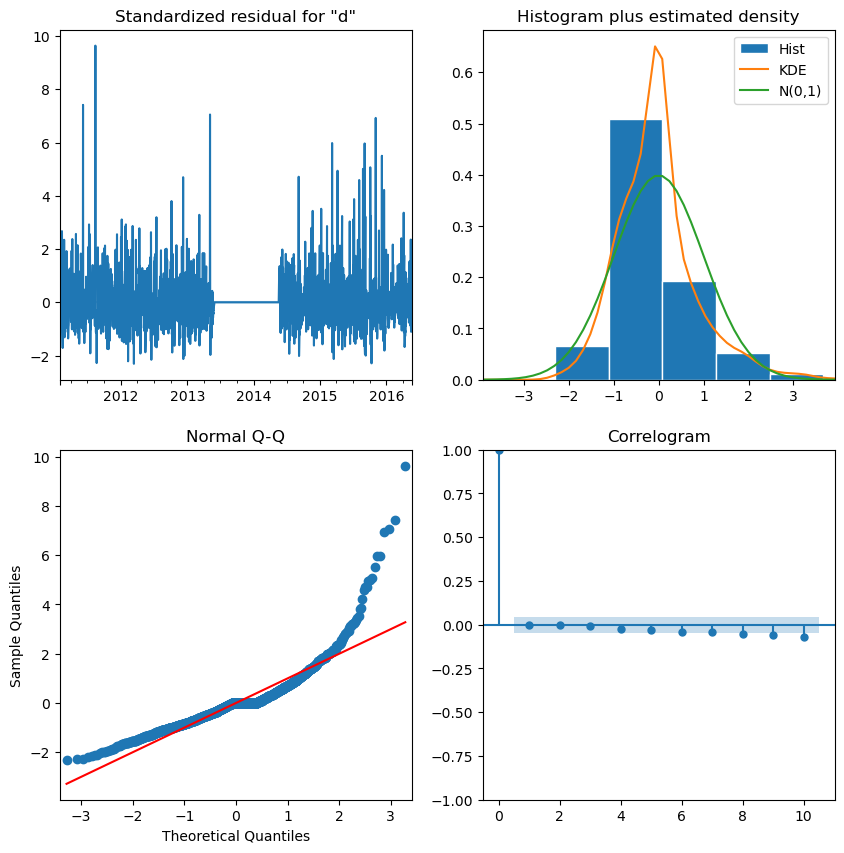

In [289]:
model_s_exog_fit.plot_diagnostics(figsize = (10,10))
plt.show()


In [ ]:
# from scipy import stats
# from scipy.stats import normaltest
# import statsmodels.api as sm

# def residuals_plot(residuals, title ="", lag_max = 35):
#     print(normaltest(residuals))
#     dim = (15,15)
#     fig = plt.figure(figsize = dim)
    
#     #Plot the distribution graph
#     fig = sns.displot(data = residuals, kde = True)
#     plt.ylabel('Frequency')
#     plt.title("Residual distribution" + title)
#     plt.show()
#     #Calculate the mu and sigma
#     (mu, sigma) = st.norm.fit(residuals)
#     print(f'Normal Distribution ($\mu = $ {mu : 2f} & $\sigma = $ {sigma : 2f} )')
    
#     plt.show()
    
# residuals_plot(model_fit.resid)    
# acf_pacf_graph(model_fit.resid)

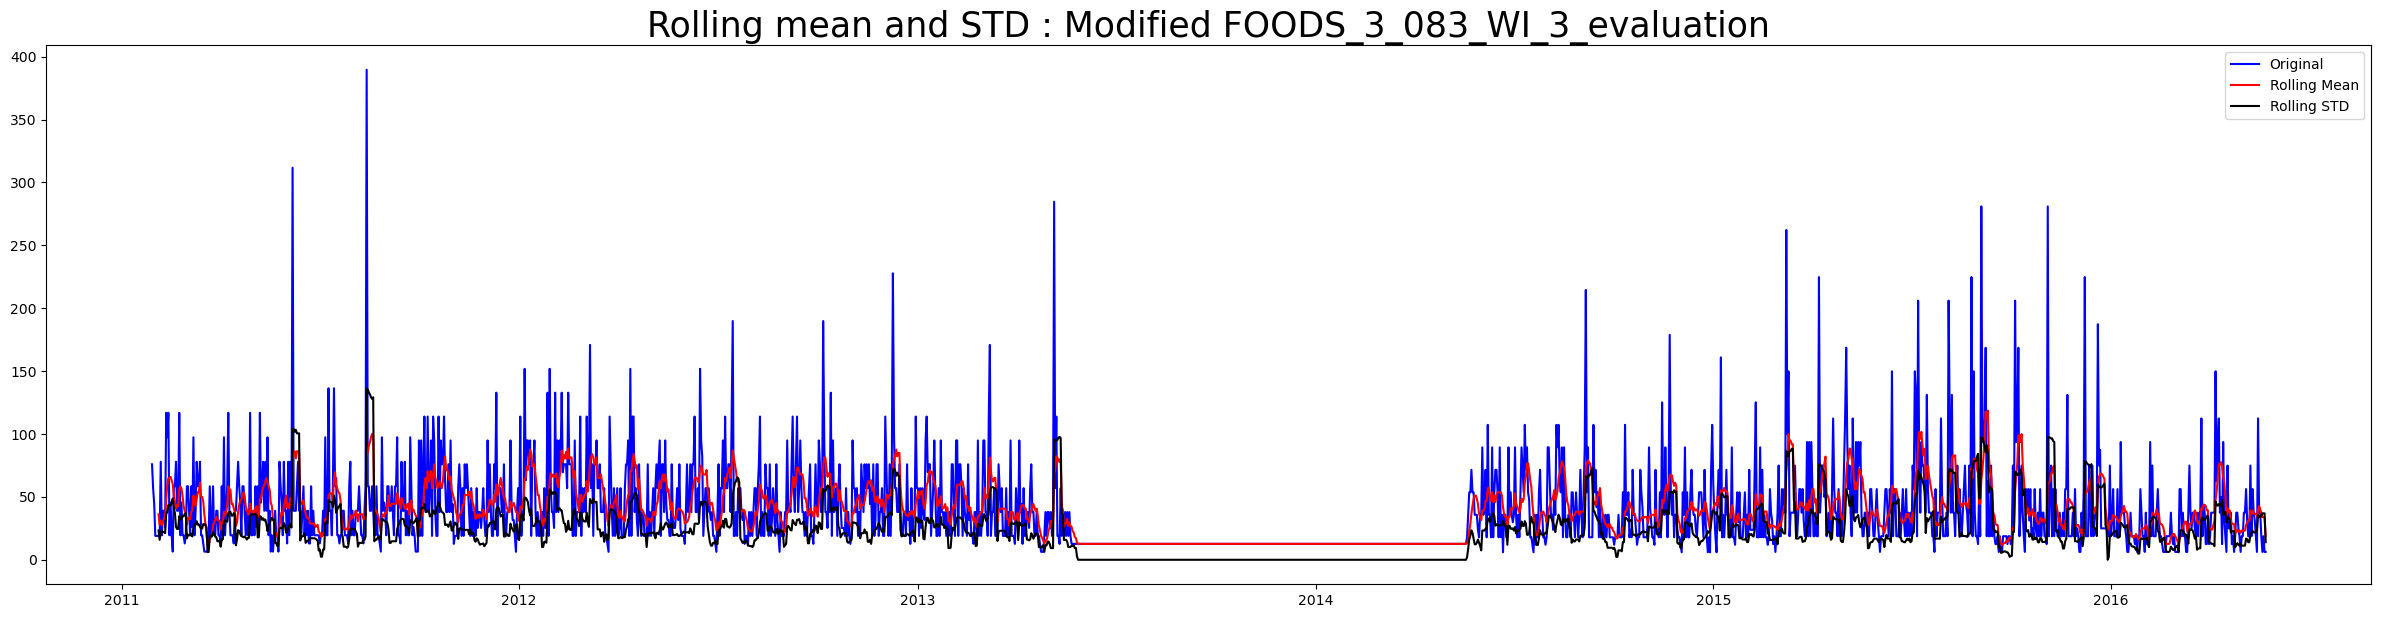

Dickey-Fuller Test: 
ADF Test Static                 -4.329499
p-value                          0.000395
# of Legs used                  26.000000
Number of Observation Used    1914.000000
Critical Value (1%)             -3.433771
Critical Value (5%)             -2.863051
Critical Value (10%)            -2.567575
dtype: float64
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [89]:
test_stationary(single_df_mod, 7, 7, " : Modified FOODS_3_083_WI_3_evaluation")

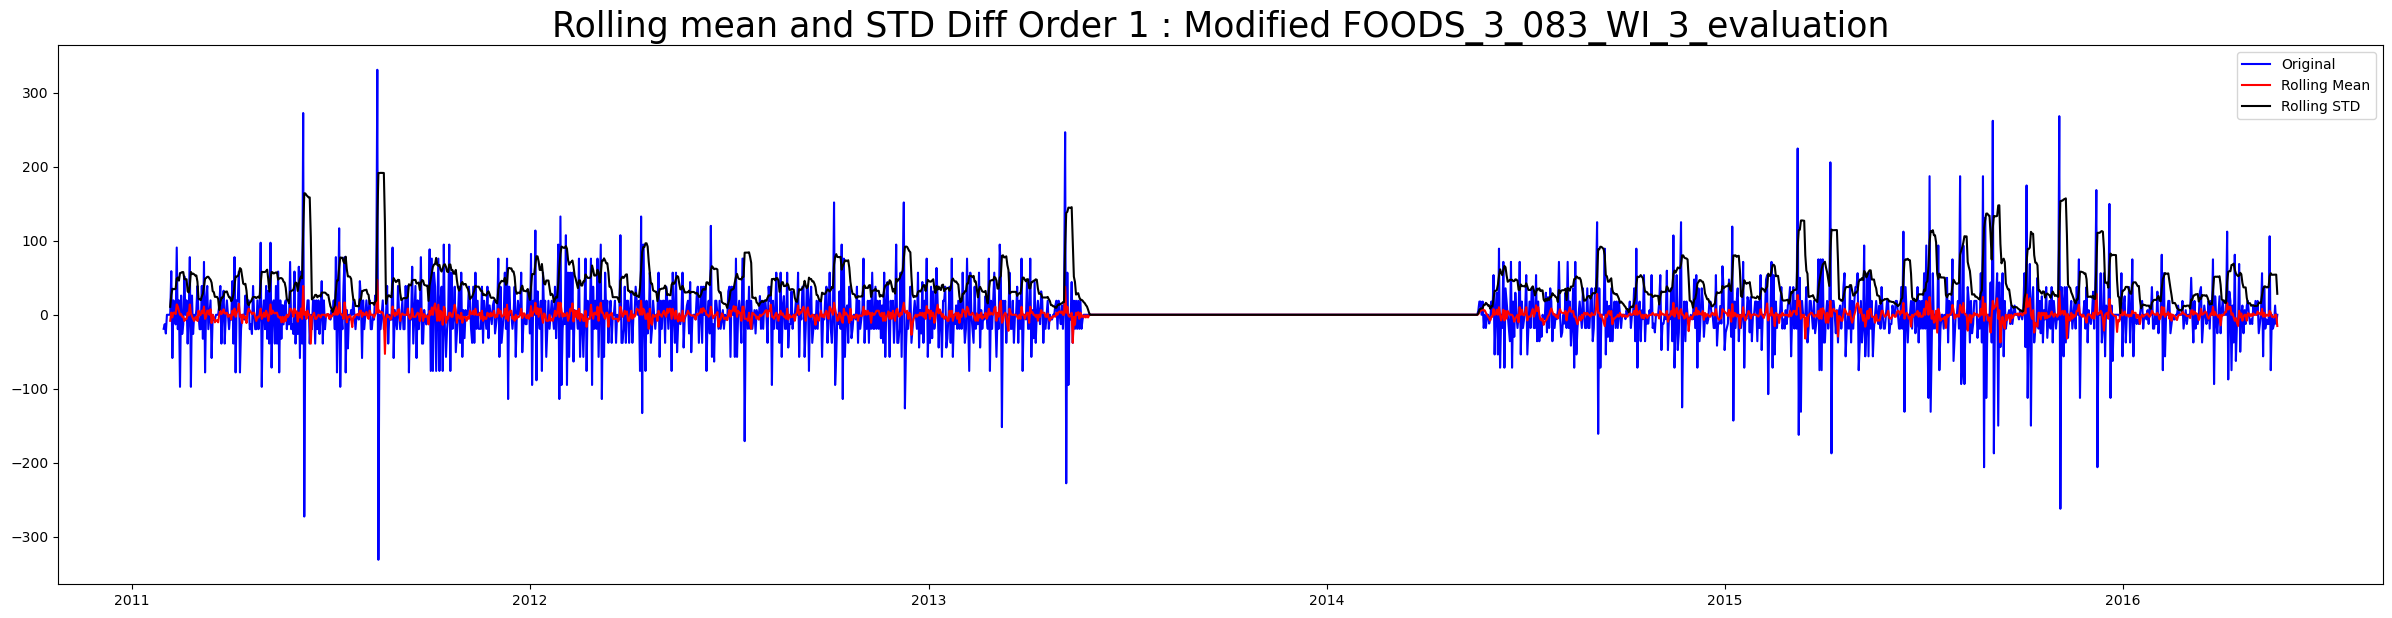

Dickey-Fuller Test: 
ADF Test Static              -1.700279e+01
p-value                       8.704203e-30
# of Legs used                2.600000e+01
Number of Observation Used    1.913000e+03
Critical Value (1%)          -3.433773e+00
Critical Value (5%)          -2.863052e+00
Critical Value (10%)         -2.567575e+00
dtype: float64
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [91]:
#Apply Differential order to the time series and analyze the stationarity characteristics
single_df_mod_diff = single_df_mod - single_df_mod.shift(1)
single_df_mod_diff.dropna(inplace = True)
test_stationary(single_df_mod_diff, 7, 7, " Diff Order 1 : Modified FOODS_3_083_WI_3_evaluation")

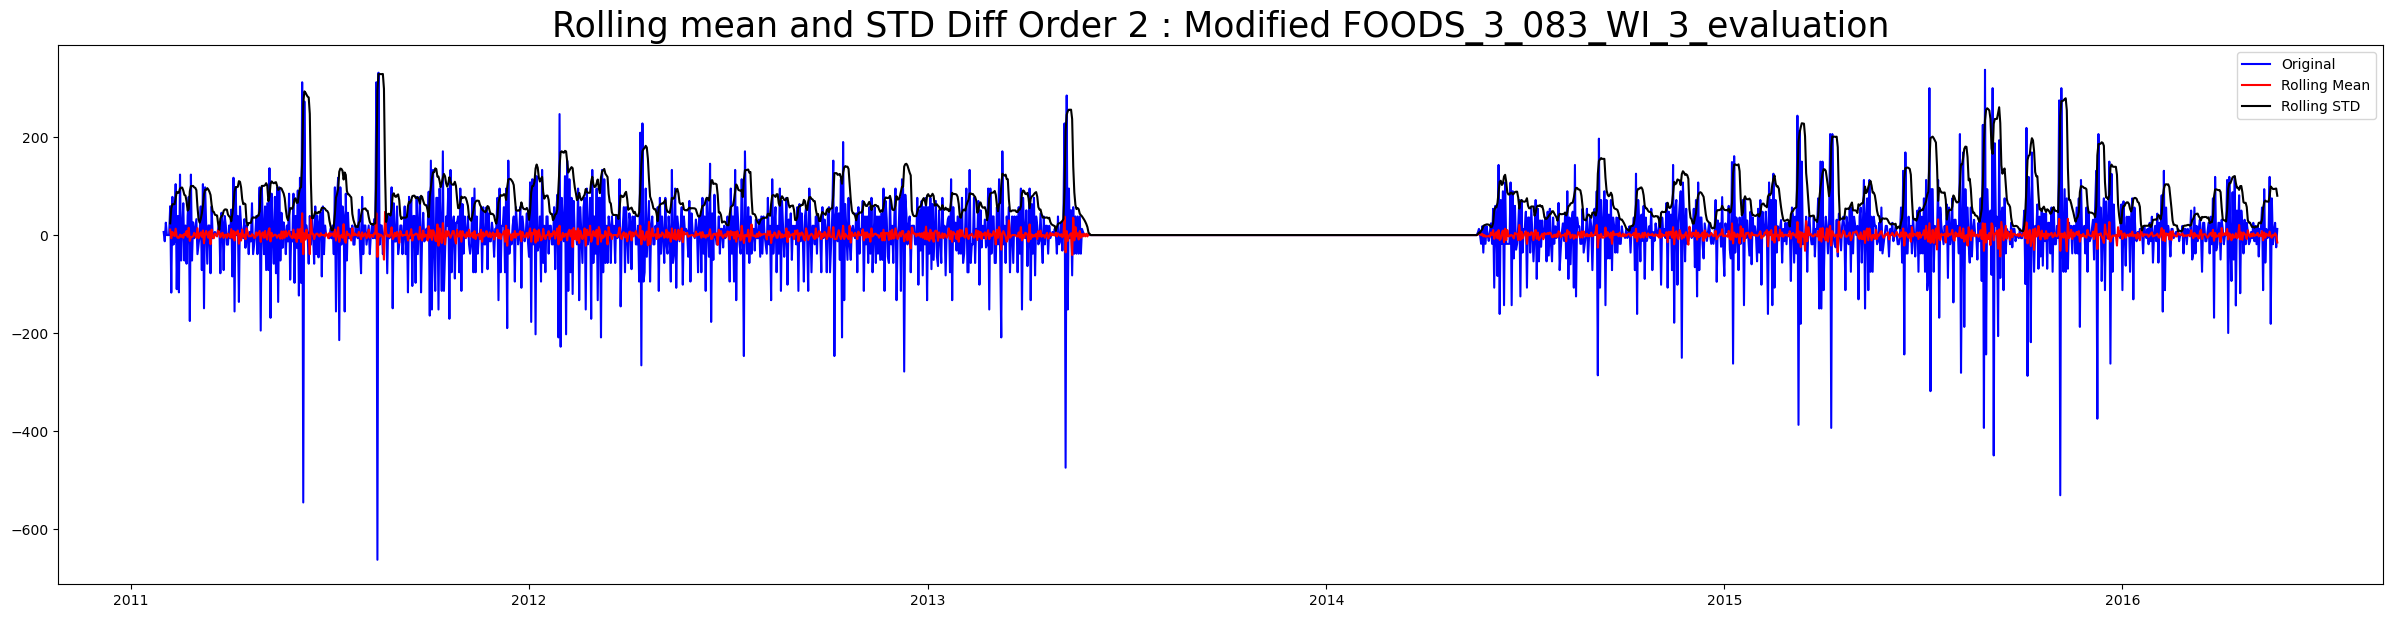

Dickey-Fuller Test: 
ADF Test Static              -1.689532e+01
p-value                       1.037560e-29
# of Legs used                2.600000e+01
Number of Observation Used    1.912000e+03
Critical Value (1%)          -3.433775e+00
Critical Value (5%)          -2.863053e+00
Critical Value (10%)         -2.567575e+00
dtype: float64
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [93]:
#Apply Differential order to the time series and analyze the stationarity characteristics
single_df_mod_diff2 = single_df_mod_diff - single_df_mod_diff.shift(1)
single_df_mod_diff2.dropna(inplace = True)
test_stationary(single_df_mod_diff2, 7, 7, " Diff Order 2 : Modified FOODS_3_083_WI_3_evaluation")

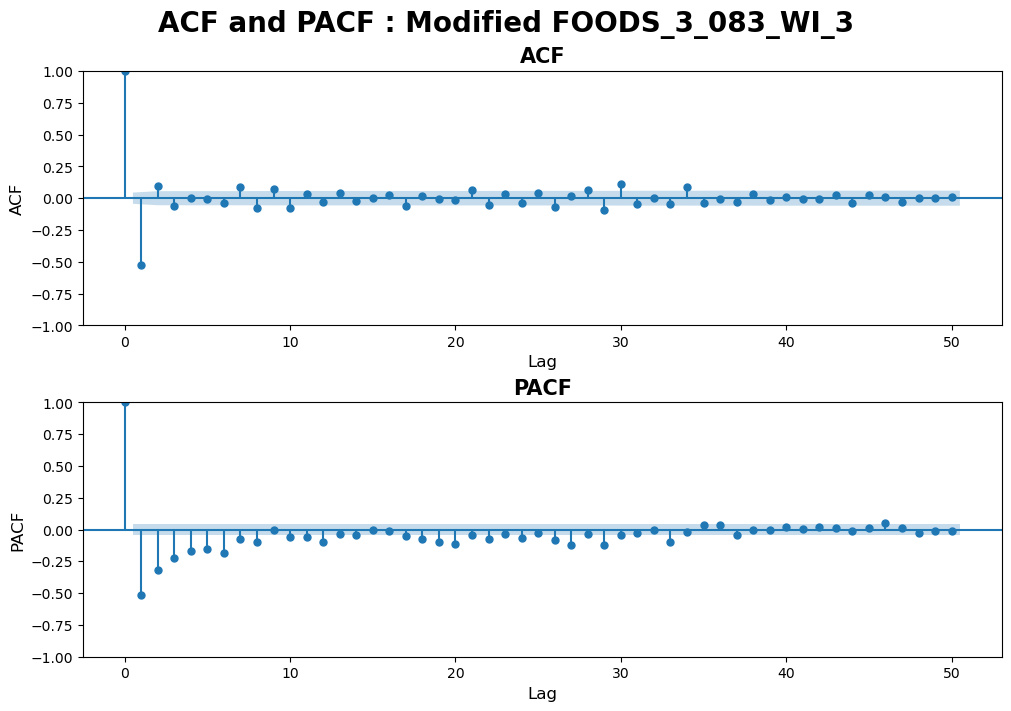

In [339]:
acf_pacf_graph(single_df_mod_diff,' : Modified FOODS_3_083_WI_3' ,50)

In [447]:
y_train, y_test, y_exog = test_train_split_sarima_mod(df_2,'FOODS_3_083_WI_3_evaluation')

In [451]:
df_2.isna().sum()

id                          0
item_id                 19403
dept_id               3591218
cat_id               21798313
store_id              4788267
state_id             18559286
sell_quantity        27942406
date                        0
wm_yr_wk                    0
wday                        0
month                       0
year                        0
event_name_1           124189
event_type_1                0
event_name_2                0
event_type_2                0
snap_CA              31462693
snap_TX              31443099
snap_WI              31441279
day                         0
is_weekend           33443355
month_day                   0
week_number                 0
events_per_day       43073327
sell_price                  0
lag_1                27958090
lag_2                27973345
lag_3                27987219
lag_7                28040303
lag_14               28139700
lag_21               28236912
lag_28               28331401
lag_35               28424599
lag_42    

In [419]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s_exog = SARIMAX(endog = y_train, order=(0,1,36), exog = y_exog)
model_s_exog_fit = model.fit()
predict_s_exog= model_s_exog_fit.predict(typ ='levels')
#start = '2016-04-22', end = '2016-05-22',
# summary of fit model
print(model_s_exog_fit.summary())

print(model_s_exog_fit.resid.describe())

MissingDataError: exog contains inf or nans

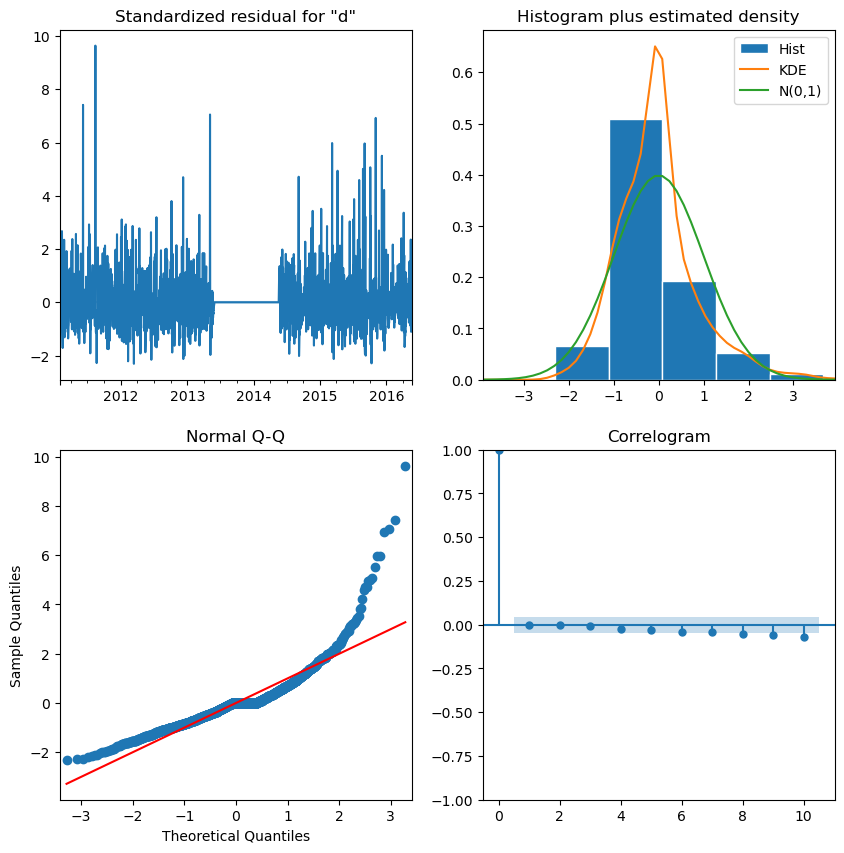

In [390]:
model_s_exog_fit.plot_diagnostics(figsize = (10,10))
plt.show()

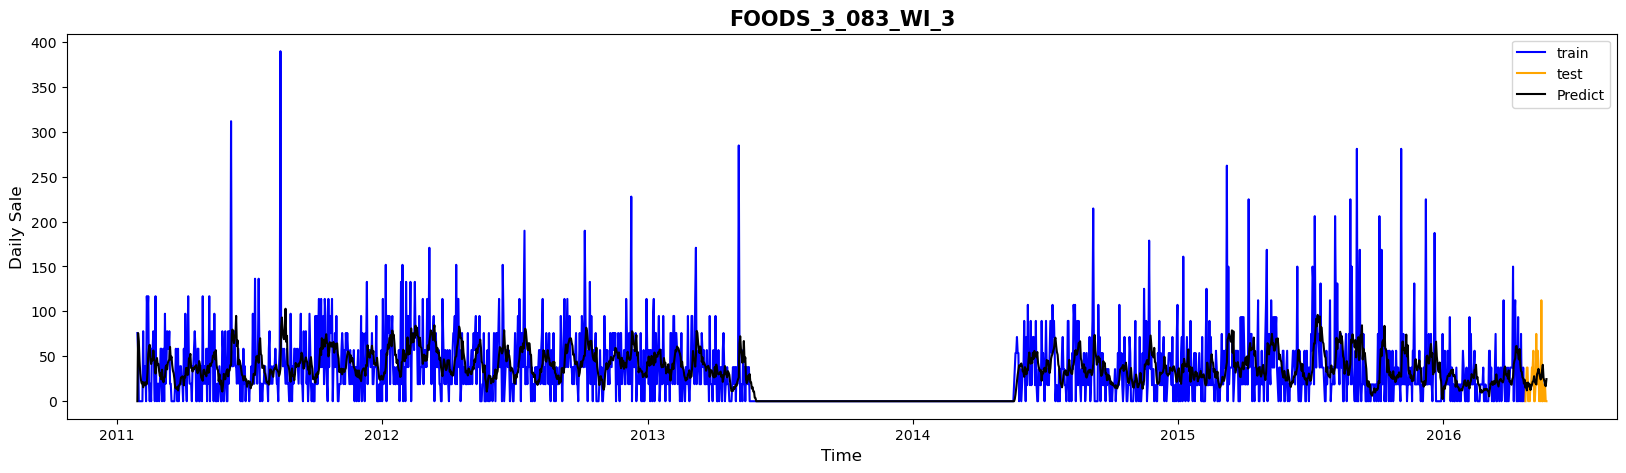

In [394]:
size = (20, 5)
plt.figure(figsize=size)
train = plt.plot(y_train, color = 'blue', label = 'train')
test = plt.plot(y_test['daily_sell'], color = 'orange', label = 'test')
predicted = plt.plot(predict_s_exog, color = 'black', label = 'Predict')
plt.legend(loc = 'best')
plt.title("FOODS_3_083_WI_3", fontsize = 15, weight = 'bold')
plt.ylabel("Daily Sale", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.show()

In [396]:
single_df_mod2 = test_df.loc[test_df['id'] == 'HOBBIES_1_084_TX_3_evaluation',['date','daily_sell_mod']].set_index('date')

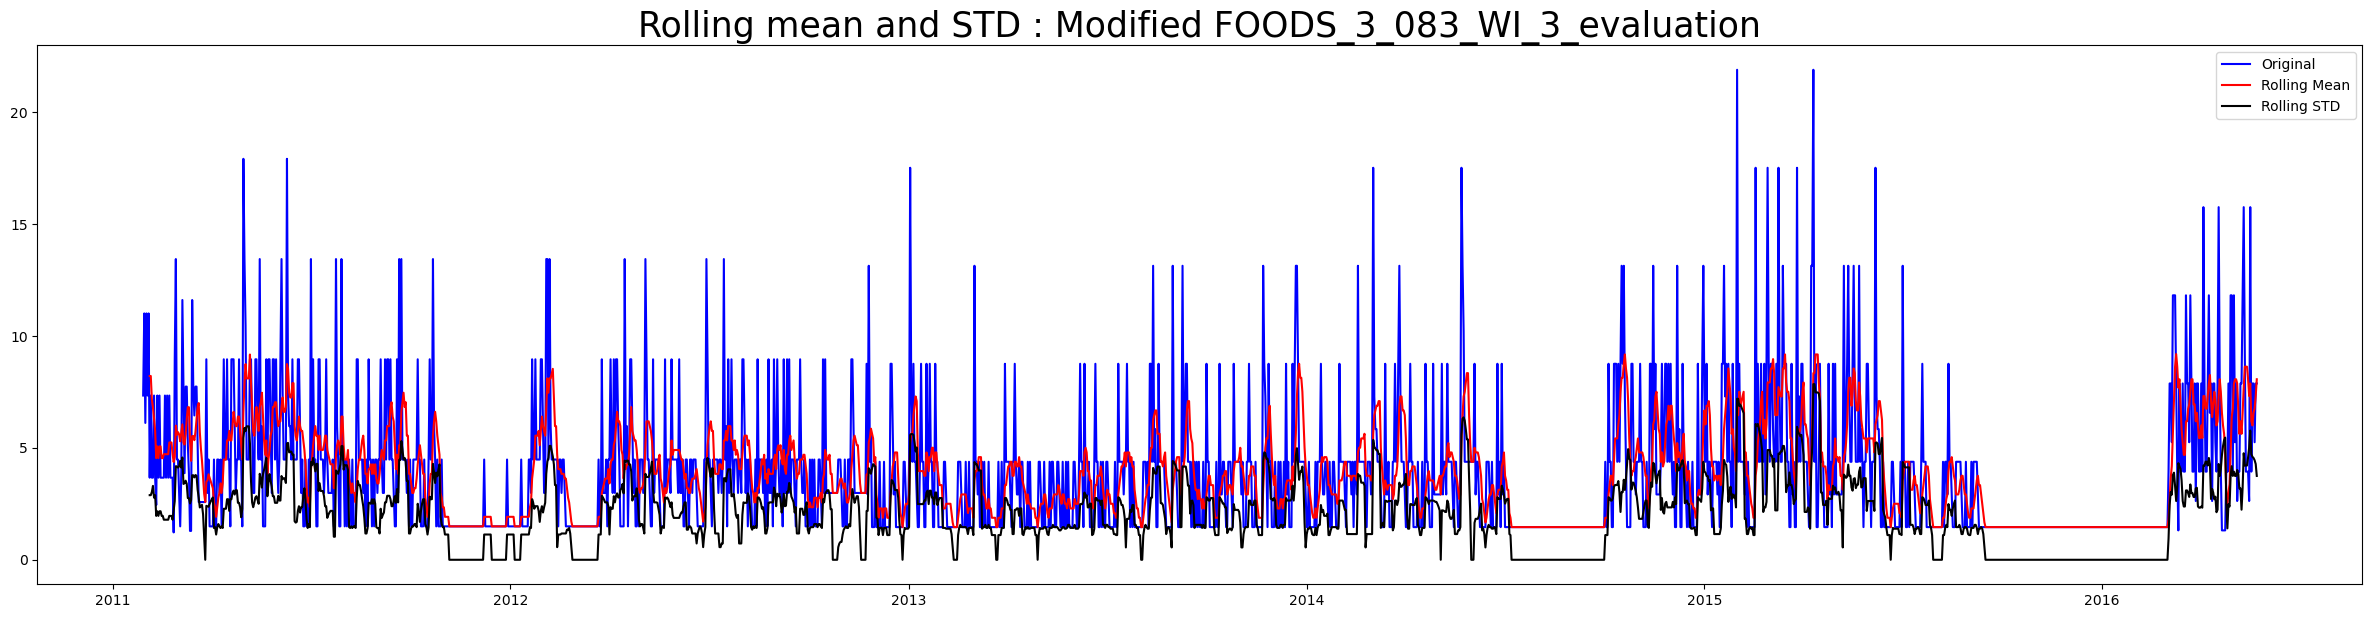

Dickey-Fuller Test: 
ADF Test Static              -5.993570e+00
p-value                       1.722653e-07
# of Legs used                1.300000e+01
Number of Observation Used    1.927000e+03
Critical Value (1%)          -3.433748e+00
Critical Value (5%)          -2.863041e+00
Critical Value (10%)         -2.567569e+00
dtype: float64
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [398]:
test_stationary(single_df_mod2, 7, 7, " : Modified HOBBIES_1_084_TX_3")

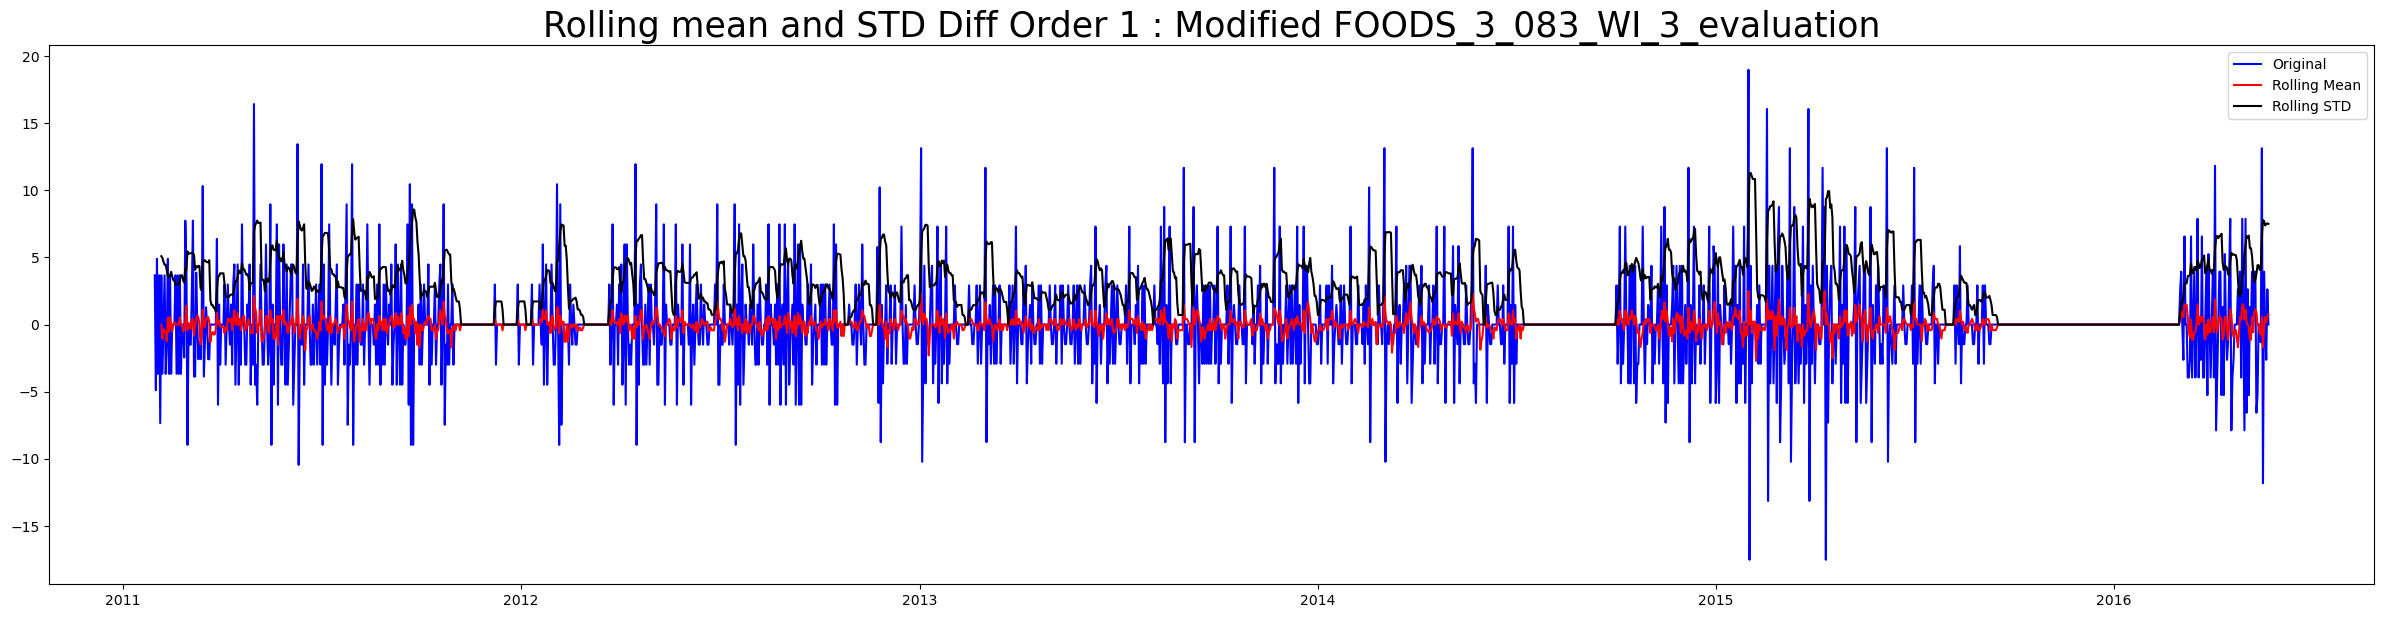

Dickey-Fuller Test: 
ADF Test Static              -1.362151e+01
p-value                       1.792970e-25
# of Legs used                2.600000e+01
Number of Observation Used    1.913000e+03
Critical Value (1%)          -3.433773e+00
Critical Value (5%)          -2.863052e+00
Critical Value (10%)         -2.567575e+00
dtype: float64
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [400]:
#Apply Differential order to the time series and analyze the stationarity characteristics
single_df_mod2_diff = single_df_mod2 - single_df_mod2.shift(1)
single_df_mod2_diff.dropna(inplace = True)
test_stationary(single_df_mod2_diff, 7, 7, " Diff Order 1 : Modified HOBBIES_1_084_TX_3")

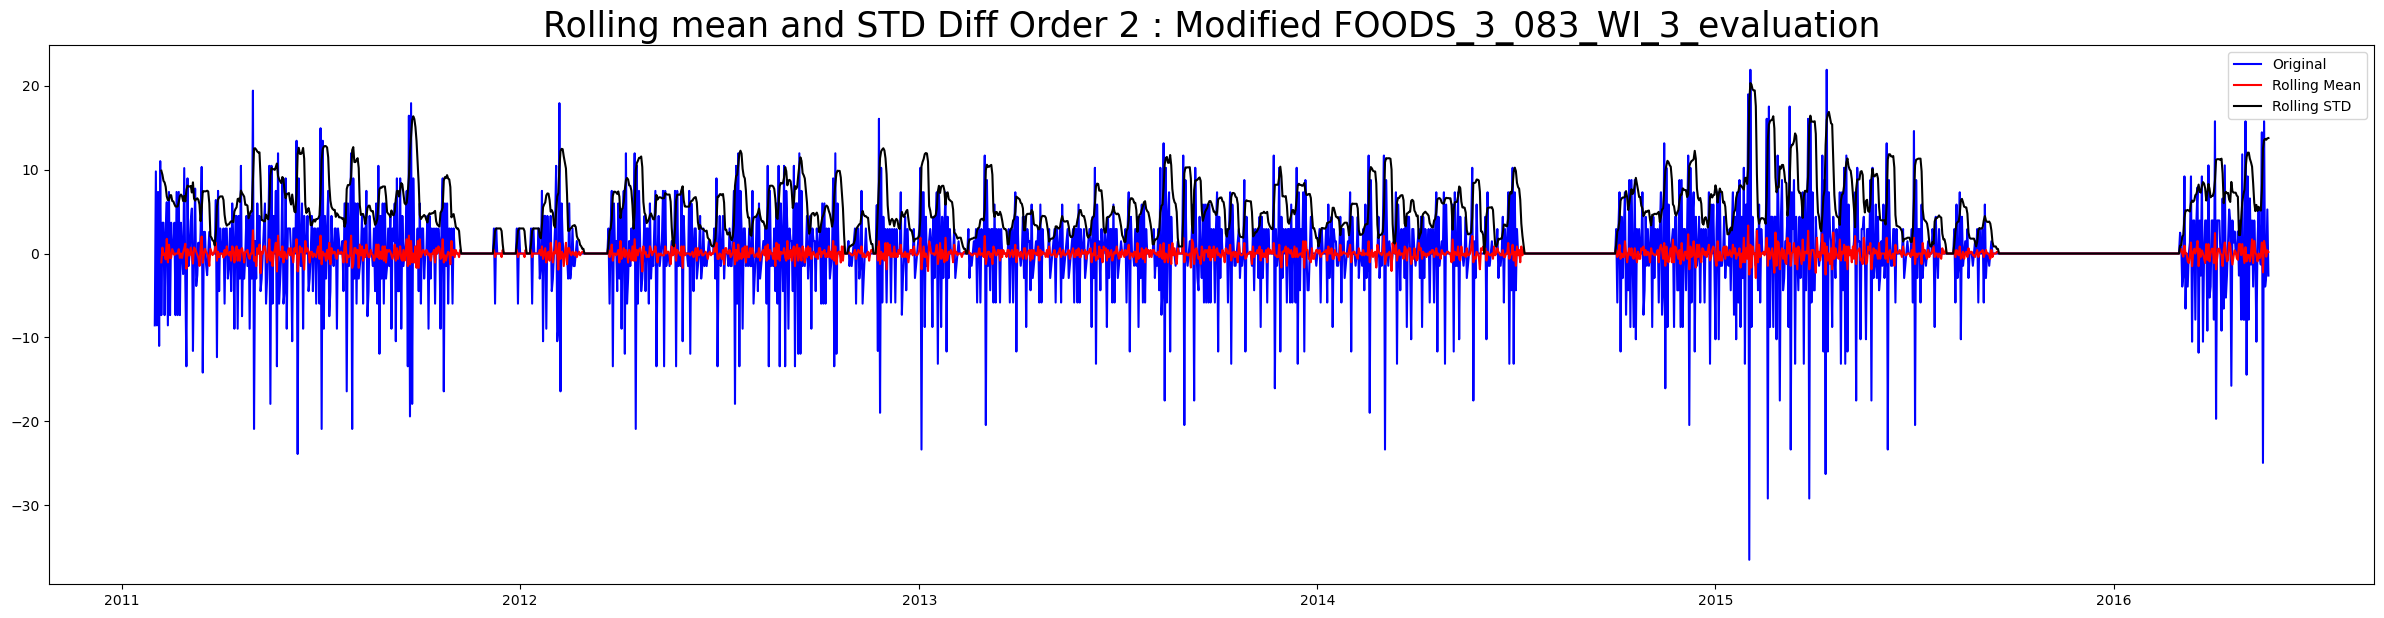

Dickey-Fuller Test: 
ADF Test Static              -1.687131e+01
p-value                       1.080550e-29
# of Legs used                2.600000e+01
Number of Observation Used    1.912000e+03
Critical Value (1%)          -3.433775e+00
Critical Value (5%)          -2.863053e+00
Critical Value (10%)         -2.567575e+00
dtype: float64
Strong evidence against the null hypothesis Ho, Reject the null hypothesis. Data is stationary


In [404]:
#Apply Differential order to the time series and analyze the stationarity characteristics
single_df_mod2_diff2 = single_df_mod2_diff - single_df_mod2_diff.shift(1)
single_df_mod2_diff2.dropna(inplace = True)
test_stationary(single_df_mod2_diff2, 7, 7, " Diff Order 2 : Modified HOBBIES_1_084_TX_3")

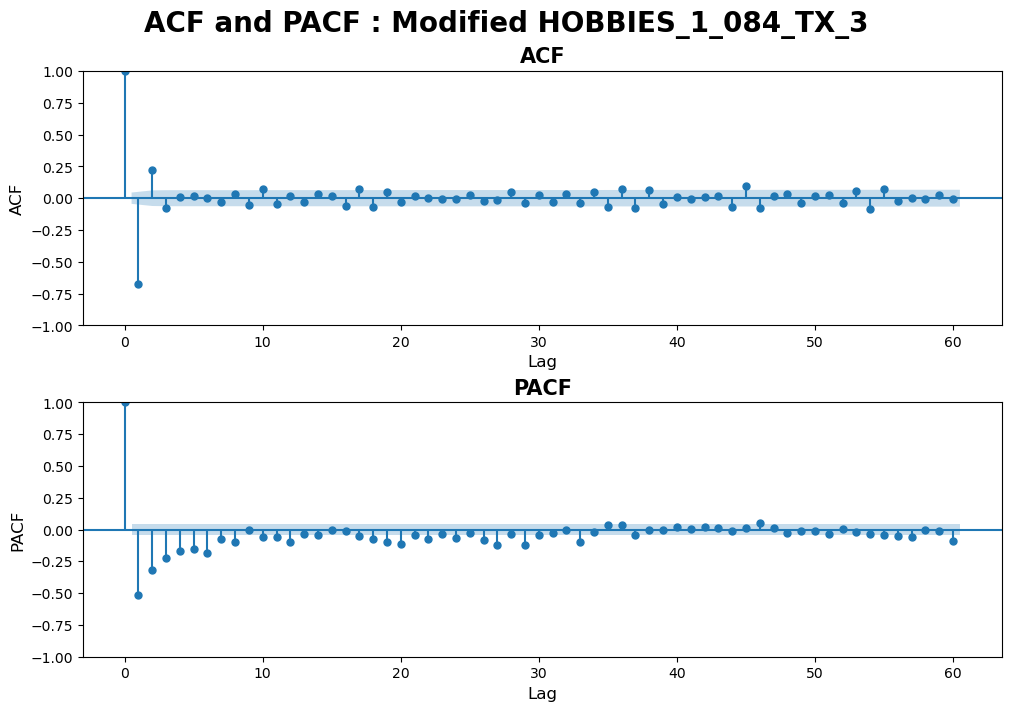

In [412]:
acf_pacf_graph(single_df_mod2_diff2,' : Modified HOBBIES_1_084_TX_3' ,60)

In [516]:

y_train, y_test, y_exog = test_train_split_sarima_mod(df_2,'HOBBIES_1_084_TX_3_evaluation')

In [521]:
df_2.isna().sum()

id                          0
item_id                 19403
dept_id               3591218
cat_id               21798313
store_id              4788267
state_id             18559286
sell_quantity        27942406
date                        0
wm_yr_wk                    0
wday                        0
month                       0
year                        0
event_name_1           124189
event_type_1                0
event_name_2                0
event_type_2                0
snap_CA              31462693
snap_TX              31443099
snap_WI              31441279
day                         0
is_weekend           33443355
month_day                   0
week_number                 0
events_per_day       43073327
sell_price                  0
daily_sell           27942406
lag_1                27958090
lag_2                27973345
lag_3                27987219
lag_7                28040303
lag_14               28139700
lag_21               28236912
lag_28               28331401
lag_35    

In [517]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s_exog = SARIMAX(endog = y_train, order=(0,1,55), exog = y_exog)
model_s_exog_fit = model.fit()
predict_s_exog= model_s_exog_fit.predict(typ ='levels')
#start = '2016-04-22', end = '2016-05-22',
# summary of fit model
print(model_s_exog_fit.summary())

print(model_s_exog_fit.resid.describe())

MissingDataError: exog contains inf or nans

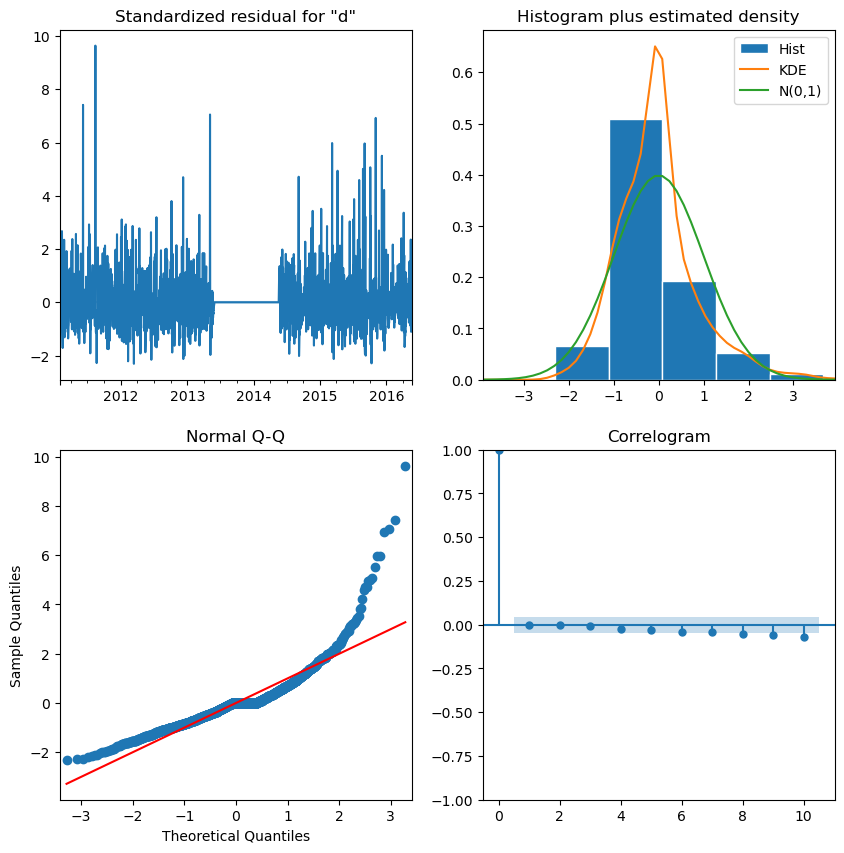

In [519]:
model_s_exog_fit.plot_diagnostics(figsize = (10,10))
plt.show()

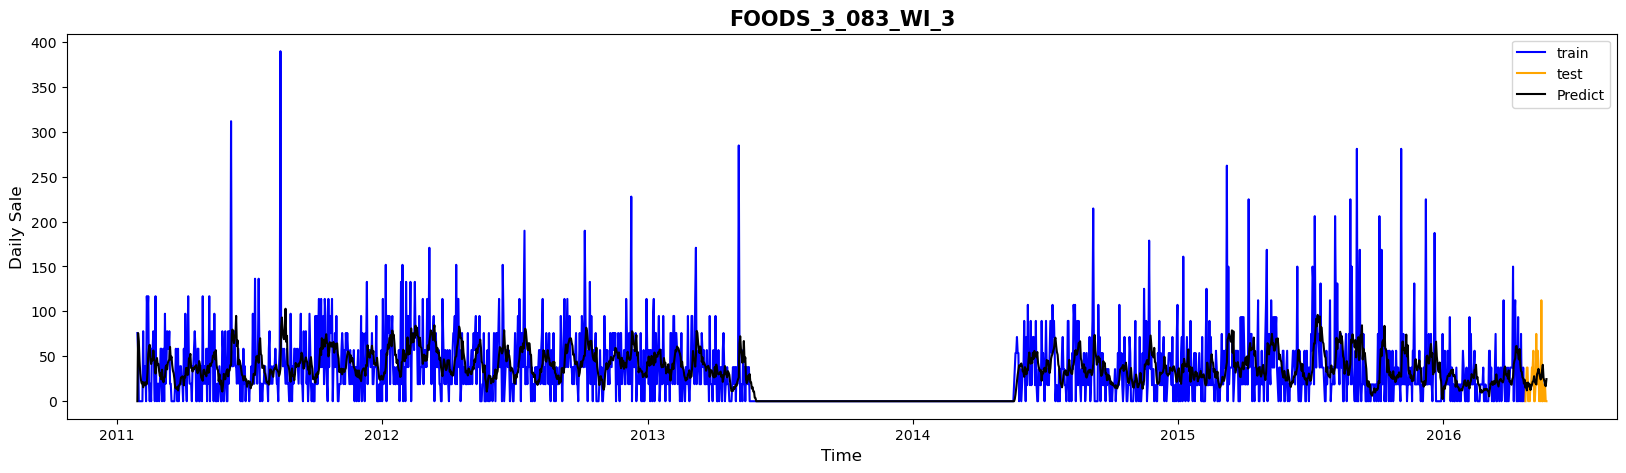

In [394]:
size = (20, 5)
plt.figure(figsize=size)
train = plt.plot(y_train, color = 'blue', label = 'train')
test = plt.plot(y_test['daily_sell'], color = 'orange', label = 'test')
predicted = plt.plot(predict_s_exog, color = 'black', label = 'Predict')
plt.legend(loc = 'best')
plt.title("HOBBIES_1_084_TX_3", fontsize = 15, weight = 'bold')
plt.ylabel("Daily Sale", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.show()

### AutoARIMA

In [98]:
y_train, y_test, y_exog = test_train_split_sarima(df,'FOODS_3_083_WI_3_evaluation')

In [299]:
from pmdarima.arima import auto_arima
auto_model1 = auto_arima(y=y_train, start_p=0, start_q=0, max_p=9,
                           max_q=9, start_P=0, start_Q=0, max_P=9,
                           max_Q=9, m=1, max_order=None,
                           trace=True, stepwise=False, exogenous = y_exog)


 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=20283.740, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=19113.741, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=19113.182, Time=0.26 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=19105.713, Time=0.45 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=19104.297, Time=0.54 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=19105.641, Time=0.95 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=19107.613, Time=0.84 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=19108.961, Time=1.00 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=19096.419, Time=1.37 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=19098.413, Time=1.59 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=19694.193, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=19112.789, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=19115.042, Time=0.67 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=19101.844, Time=0.91 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=19103.615, Time=0.82

In [301]:
print(auto_model1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1911
Model:               SARIMAX(7, 1, 9)   Log Likelihood               -9520.642
Date:                Fri, 26 Apr 2024   AIC                          19077.284
Time:                        21:20:27   BIC                          19177.272
Sample:                    01-29-2011   HQIC                         19114.083
                         - 04-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0390      0.093     -0.419      0.675      -0.221       0.143
ar.L1         -1.0676      0.163     -6.534      0.000      -1.388      -0.747
ar.L2          0.1159      0.219      0.528      0.5

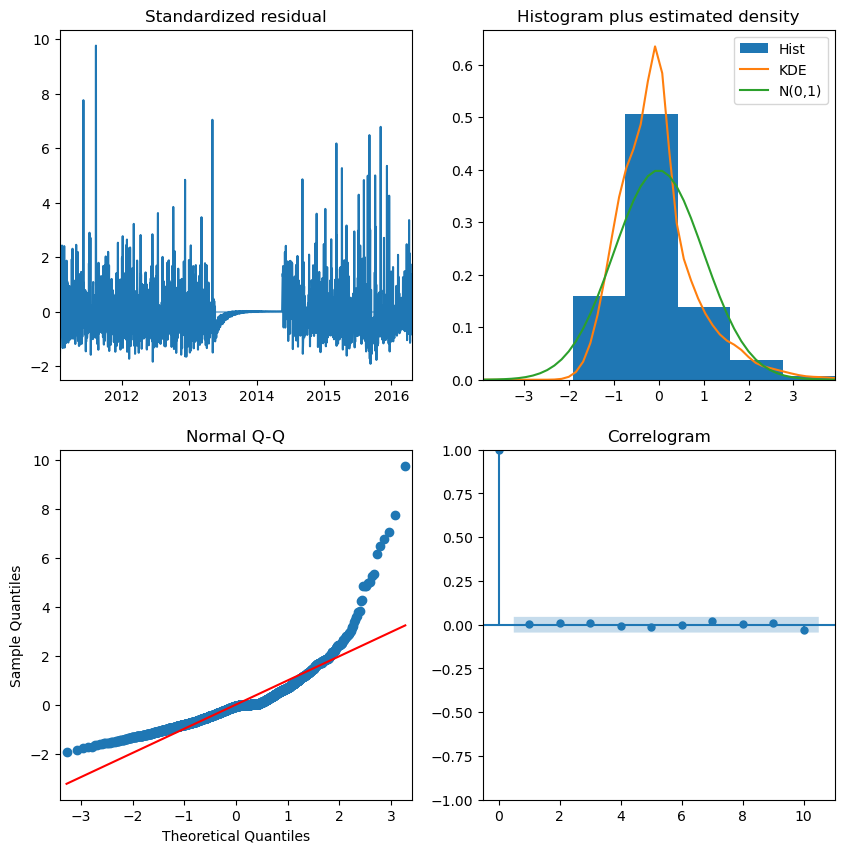

In [303]:
auto_model1.plot_diagnostics(figsize = (10,10))
plt.show()

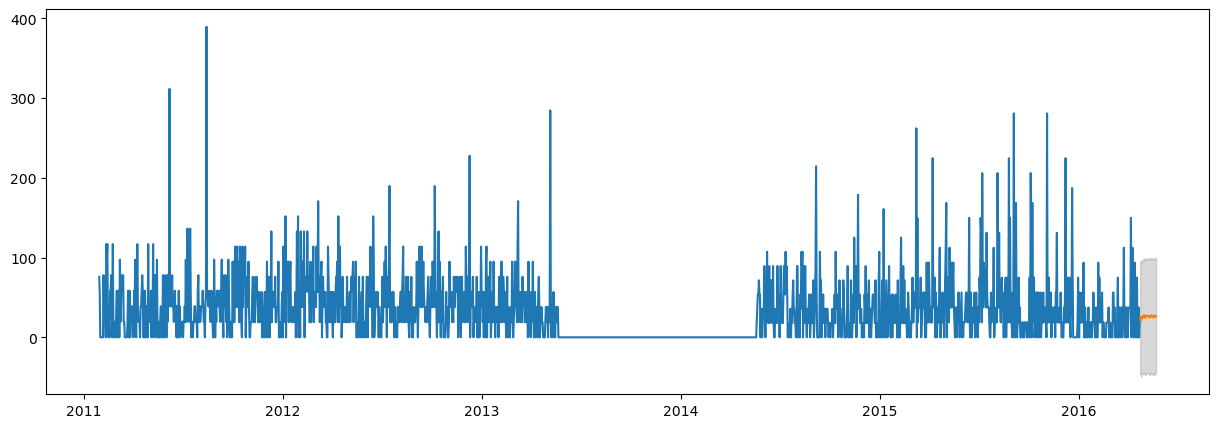

In [320]:
prediction, confint = auto_model1.predict(n_periods=y_test.shape[0], return_conf_int=True)

cf= pd.DataFrame(confint)
prediction_series = pd.Series(prediction,index=y_test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(y_train)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [357]:
y_train, y_test, y_exog = test_train_split_sarima_mod(df_2,'FOODS_3_083_WI_3_evaluation')

NameError: name 'test_train_split_sarima_mod' is not defined

In [378]:
auto_model1 = auto_arima(y=y_train, start_p=0, start_q=0, max_p=9,
                           max_q=9, start_P=0, start_Q=0, max_P=9,
                           max_Q=9, m=1, max_order=None,
                           trace=True, stepwise=False, exogenous = y_exog)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=19812.533, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=18791.584, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=18775.397, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=18754.482, Time=0.53 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=18753.315, Time=0.66 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=18752.889, Time=0.82 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=18754.860, Time=0.90 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=18756.542, Time=1.13 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=18749.024, Time=1.28 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=18751.009, Time=1.60 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=19262.371, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=18771.009, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=18750.085, Time=0.84 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=18750.151, Time=0.95 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=18752.435, Time=0.67

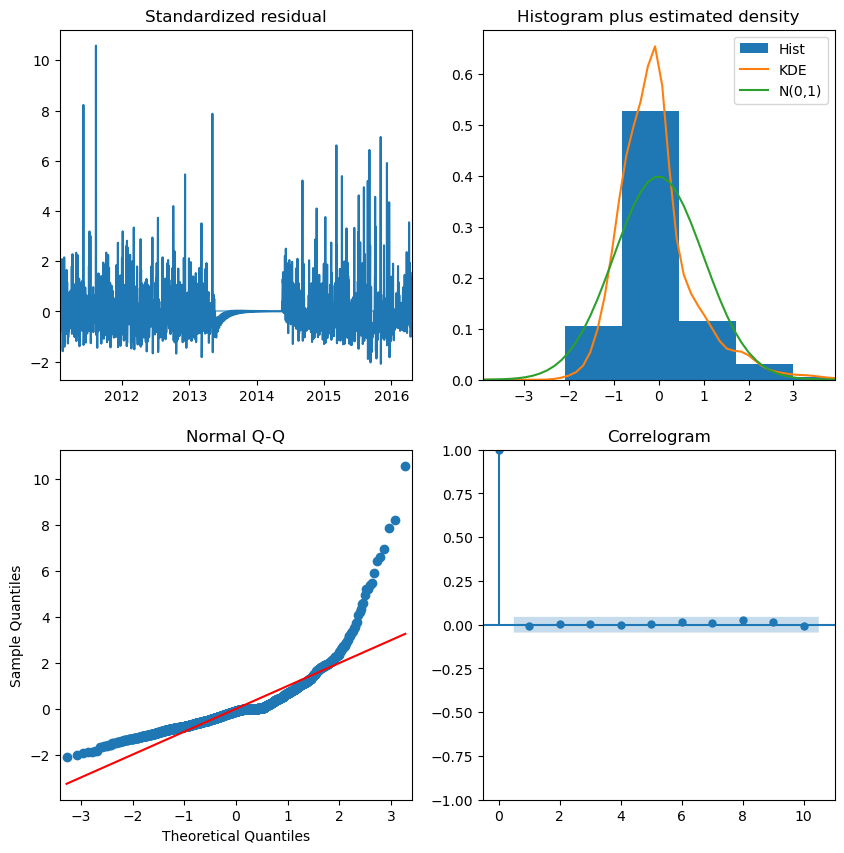

In [380]:
auto_model1.plot_diagnostics(figsize = (10,10))
plt.show()

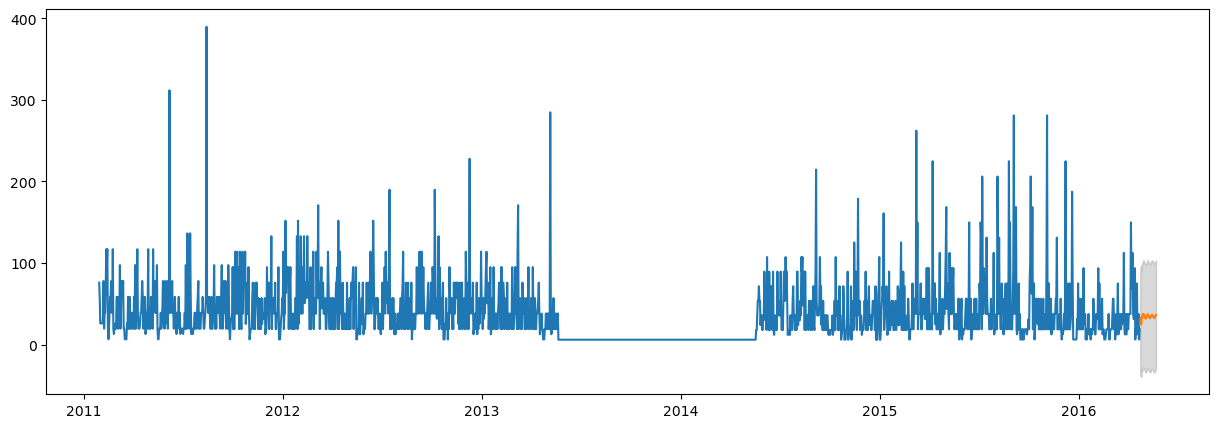

In [382]:
prediction, confint = auto_model1.predict(n_periods=y_test.shape[0], return_conf_int=True)

cf= pd.DataFrame(confint)
prediction_series = pd.Series(prediction,index=y_test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(y_train)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [ ]:
model_s_exog_fit.plot_diagnostics(figsize = (10,10))
plt.show()

### Apply to each product

In [376]:
id_list_test = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_TX_3_evaluation', 'FOODS_2_085_CA_3_evaluation']

In [355]:
from pmdarima.arima import auto_arima

for product in id_list_test:
    #Split train, test, exogeneous variables
    y_train, y_test, y_exog = test_train_split_sarima_mod(df2,product)
    auto_model1 = auto_arima(y=y_train, start_p=0, start_q=0, max_p=9,
                               max_q=9, start_P=0, start_Q=0, max_P=9,
                               max_Q=9, m=1, max_order=None,
                               trace=True, exogenous = y_exog)
    prediction, confint = auto_model1.predict(n_periods=y_test.shape[0], return_conf_int=True)
    

NameError: name 'id_list_test' is not defined

### table


product id, actual data, prediction data, ape, residual, abs residual, r^2, adjusted ^2

In [347]:
eval_col = ['date','id', 'actual', 'predicted', 'residual','abs_residual', 'ape', 'r2', 'adjust_r2']
eval_df = pd.DataFrame(columns = eval_col)

eval_df['date'] = pd.to_datetime(eval_df['date'])

In [351]:
# Create predictions for the future, evaluate on test
preds, conf_int = auto_model1.predict(n_periods=y_test.shape[0], return_conf_int=True)

# Print the error:
from sklearn.metrics import mean_squared_error
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, preds)))

NameError: name 'auto_model1' is not defined

In [349]:
eval_df['predicted'] = preds
eval_df

NameError: name 'preds' is not defined

In [ ]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_TX_3_evaluation', 'FOODS_2_085_CA_3_evaluation']


df_1_experiement = test_df.loc[test_df['id'] == multi_items[0], ['date','daily_sell']].set_index('date')


df_2_experiement = test_df.loc[test_df['id'] == multi_items[1], ['date','daily_sell']].set_index('date')


df_3_experiement = test_df.loc[test_df['id'] == multi_items[2], ['date','daily_sell']].set_index('date')


In [ ]:
df_1_experiement.head()

In [ ]:
# from matplotlib import pyplot
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Change default figsize
# plt.rc("figure",figsize=(20,20))
# result = seasonal_decompose(df_1_experiement, model='multiplicative')
# result.plot()

In [ ]:


df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df.head()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [ ]:
from pmdarima.arima import auto_arima
auto_model1 = auto_arima(y=df_1_experiement, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

prediction1, confint1 = auto_model1.predict(n_periods=y_train_1.size, return_conf_int=True)

In [ ]:
df_1_experiement.columns

In [ ]:
#With cut off in the funtion
def test_train_separator_wCutoff_ARIMA(table, testing_product, cutoff_date, test_date):
    

    
    #Data to cut off
    df_table = table.loc[(table['day'] > cutoff_date) & (table['id'] == testing_product)]
    df_table = df_table.set_index('date')
    x_train=df_table.loc[df_table['day']<=validate_date]
    x_test=df_table.loc[df_table['day']>=est_date]

    y_train=x_train[testing_product]
    y_valid=x_valid[testing_product]
    y_test=x_test[testing_product]

    x_train=x_train.drop(testing_product,axis=1)
    x_valid=x_valid.drop(testing_product,axis=1)
    x_test=x_test.drop(testing_product,axis=1)
    
    return y_train, x_train, y_valid, x_valid, y_test, x_test

## ML Models

In [ ]:
from sklearn.model_selection import train_test_split

def test_train_validate(table, product, target, cutoff_date, validate_date, test_date):
    x = table.loc[table['id'] == product].drop(target, axis = 1)
    y = table.loc[table['id'] == product, target]
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)
    #Data to cut off
    df_table = table.loc[(table['id'] == target) ]
    x_train=df_table.loc[(table['id'] == target) & df_table['day']<=validate_date]
    x_valid=df_table.loc[(table['id'] == target) &  (df_table['day'] > validate_date) & (df_table['day'] < test_date)]
    x_test=df_table.loc[(table['id'] == target) & df_table['day']>=test_date]

    y_train=x_train[testing_product]
    y_valid=x_valid[testing_product]
    y_test=x_test[testing_product]

    x_train=x_train.drop(testing_product,axis=1)
    x_valid=x_valid.drop(testing_product,axis=1)
    x_test=x_test.drop(testing_product,axis=1)
    
    return y_train, x_train, y_valid, x_valid, y_test, x_test

In [ ]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_TX_3_evaluation', 'FOODS_2_085_CA_3_evaluation']


df_1_ML_experiement = test_df.loc[test_df['id'] == multi_items[0]]


df_2_ML_experiement = test_df.loc[test_df['id'] == multi_items[1]]


df_3_ML_experiement = test_df.loc[test_df['id'] == multi_items[2]]

In [ ]:
def diff(first, second):
        second = set(second)
        return [item for item in first if item not in second]

In [ ]:
li1 = df['id'].loc[df['day'] == 1850].unique().tolist()
li2 = df['id'].loc[df['day'] == 1835].unique().tolist()

temp3 = []
for element in li1:
    if element not in li2:
        temp3.append(element)
 
print(temp3)

In [ ]:
len(df['id'].loc[df['day'] == 1850].unique())

In [ ]:
len(df['id'].unique())

In [ ]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_TX_3_evaluation', 'FOODS_2_085_CA_3_evaluation']

y_train_1, x_train_1, y_valid_1, x_valid_1, y_test_1, x_test_1 = test_train_validate(df_1_ML_experiement, multi_items[0], 1000, 1881, 1911)
y_train_2, x_train_2, y_valid_2, x_valid_2, y_test_2, x_test_2 = test_train_validate(df_2_ML_experiement, multi_items[1], 1000, 1881, 1911)
y_train_3, x_train_3, y_valid_3, x_valid_3, y_test_3, x_test_3 = test_train_validate(df_3_ML_experiement, multi_items[2], 1000, 1881, 1911)

In [ ]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs(Y_actual - Y_Predicted))
    return mape

In [ ]:
def APE(Y_actual, Y_Predicted):
    ape = (np.abs(Y_actual - Y_Predicted)/np.abs(Y_actual))*100
    return ape

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

prediction1, confint1 = auto_model1.predict(n_periods=y_train_1.size, return_conf_int=True)
prediction2, confint2 = auto_model2.predict(n_periods=y_train_1.size, return_conf_int=True)
prediction3, confint3 = auto_model3.predict(n_periods=y_train_1.size, return_conf_int=True)

In [ ]:
cf= pd.DataFrame(confint1)
prediction_series = pd.Series(prediction1,index=y_test_1.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_1_experiement[)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [ ]:
cf= pd.DataFrame(confint2)
prediction_series = pd.Series(prediction2,index=y_test_2.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(eva_df)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [ ]:
cf= pd.DataFrame(confint3)
prediction_series = pd.Series(prediction3,index=y_test_3.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(eva_df)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression().fit(x_train_1, y_train_1)
y_pred_1=lr1.predict(x_valid_1)
lr2 = LinearRegression().fit(x_train_2, y_train_2)
y_pred_2=lr2.predict(x_valid_2)
lr3 = LinearRegression().fit(x_train_3, y_train_3)
y_pred_3=lr3.predict(x_valid_3)

print("MAPE: {}".format(MAPE(y_pred_1,y_valid_1)))
print("MAPE: {}".format(MAPE(y_pred_2,y_valid_2)))
print("MAPE: {}".format(MAPE(y_pred_3,y_valid_3)))
results = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_1,'Predicted_mod_7days': y_pred_2,'Predicted_no_zero': y_pred_3})
ape_results = pd.DataFrame({'Predicted_APE': APE(y_pred_1,y_valid_1),'Predicted_mod_7days_APE': APE(y_pred_2,y_valid_2),'Predicted_no_zero_APE': APE(y_pred_3,y_valid_3)})
ape_results

In [ ]:
fig,ax =  plt.subplots(nrows= 1, ncols=3, figsize = (10, 5), constrained_layout=True, sharey=True) 

fig.suptitle('Linear Regression comparison with different fill', fontsize = 20, weight = 'bold')
test_list = ['Predicted','Predicted_mod_7days','Predicted_no_zero']
for i in range(0,len(test_list)):
    x = "Actual"
    y = test_list[i]
    graph_item = sns.scatterplot(x = x, y = y, data = results, 
                 ax = ax[i]) 
    graph_item.set_title(test_list[i], size = 12, weight = 'bold')
    graph_item.set_xlabel("Actual Result", fontsize=10)
    graph_item.set_ylabel("Predicted Result", fontsize=10)
    max_val = max(max(results[x]), max(results[y]))
    ax[i].plot([0, max_val], [0, max_val], color='red', linestyle='--')
    ax[i].set_xlim(0, max_val)
    ax[i].set_ylim(0, max_val)

In [ ]:
import shap

# Initialize JS visualization code
shap.initjs()

# Create an explainer object with the model and the data in this case experiment1 data
explainer1 = shap.Explainer(lr1, x_train_1)
explainer2 = shap.Explainer(lr2, x_train_2)
explainer3 = shap.Explainer(lr3, x_train_3)

# Calculate SHAP values
shap_values_1 = explainer1(x_train_1)
shap_values_2 = explainer2(x_train_2)
shap_values_3 = explainer3(x_train_3)

# Plot feature importance
# fig, ax =  plt.subplots(nrows= 1, ncols=3, figsize = (10, 5), constrained_layout=True, sharey=True) 

shap.plots.bar(shap_values_1[0])
shap.plots.bar(shap_values_2[0])
shap.plots.bar(shap_values_3[0])
# shap.summary_plot(shap_values_2, x_train_2, ax = ax[1], show = False)
# shap.summary_plot(shap_values_3, x_train_3, ax = ax[2], show = False)


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

dt1 = tree_model.fit(x_train_1, y_train_1)
y_pred_1=dt1.predict(x_valid_1)
dt2 = tree_model.fit(x_train_2, y_train_2)
y_pred_2=dt2.predict(x_valid_2)
dt3 = tree_model.fit(x_train_3, y_train_3)
y_pred_3=dt3.predict(x_valid_3)

print("MAPE: {}".format(MAPE(y_pred_1,y_valid_1)))
print("MAPE: {}".format(MAPE(y_pred_2,y_valid_2)))
print("MAPE: {}".format(MAPE(y_pred_3,y_valid_3)))
results = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_1,'Predicted_mod_7days': y_pred_2,'Predicted_no_zero': y_pred_3})
ape_results = pd.DataFrame({'Predicted_APE': APE(y_pred_1,y_valid_1),'Predicted_mod_7days_APE': APE(y_pred_2,y_valid_2),'Predicted_no_zero_APE': APE(y_pred_3,y_valid_3)})
ape_results

In [ ]:
fig,ax =  plt.subplots(nrows= 1, ncols=3, figsize = (10, 5), constrained_layout=True, sharey=True) 

fig.suptitle('Decision Tree Regressor comparison with different fill', fontsize = 20, weight = 'bold')
test_list = ['Predicted','Predicted_mod_7days','Predicted_no_zero']
for i in range(0,len(test_list)):
    x = "Actual"
    y = test_list[i]
    graph_item = sns.scatterplot(x = x, y = y, data = results, 
                 ax = ax[i]) 
    graph_item.set_title(test_list[i], size = 12, weight = 'bold')
    graph_item.set_xlabel("Actual Result", fontsize=10)
    graph_item.set_ylabel("Predicted Result", fontsize=10)
    max_val = max(max(results[x]), max(results[y]))
    ax[i].plot([0, max_val], [0, max_val], color='red', linestyle='--')
    ax[i].set_xlim(0, max_val)
    ax[i].set_ylim(0, max_val)

In [ ]:
import shap

# Initialize JS visualization code
shap.initjs()

# Create an explainer object with the model and the data in this case experiment1 data
explainer1 = shap.Explainer(dt1, x_train_1)
explainer2 = shap.Explainer(dt2, x_train_2)
explainer3 = shap.Explainer(dt3, x_train_3)

# Calculate SHAP values
shap_values_1 = explainer1(x_train_1, check_additivity=False)
shap_values_2 = explainer2(x_train_2)
shap_values_3 = explainer3(x_train_3)

# Plot feature importance
# fig, ax =  plt.subplots(nrows= 1, ncols=3, figsize = (10, 5), constrained_layout=True, sharey=True) 

shap.plots.bar(shap_values_1[0])
shap.plots.bar(shap_values_2[0])
shap.plots.bar(shap_values_3[0])
# shap.summary_plot(shap_values_2, x_train_2, ax = ax[1], show = False)
# shap.summary_plot(shap_values_3, x_train_3, ax = ax[2], show = False)


In [ ]:
from xgboost import XGBRegressor

model =XGBRegressor()

xgb1 = model.fit(x_train_1, y_train_1)
y_pred_1=xgb1.predict(x_valid_1)
xgb2 = model.fit(x_train_2, y_train_2)
y_pred_2=xgb2.predict(x_valid_2)
xgb3 = model.fit(x_train_3, y_train_3)
y_pred_3=xgb3.predict(x_valid_3)

print("MAPE: {}".format(MAPE(y_pred_1,y_valid_1)))
print("MAPE: {}".format(MAPE(y_pred_2,y_valid_2)))
print("MAPE: {}".format(MAPE(y_pred_3,y_valid_3)))
results = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred_1,'Predicted_mod_7days': y_pred_2,'Predicted_no_zero': y_pred_3})
ape_results = pd.DataFrame({'Predicted_APE': APE(y_pred_1,y_valid_1),'Predicted_mod_7days_APE': APE(y_pred_2,y_valid_2),'Predicted_no_zero_APE': APE(y_pred_3,y_valid_3)})
ape_results

In [ ]:
fig,ax =  plt.subplots(nrows= 1, ncols=3, figsize = (10, 5), constrained_layout=True, sharey=True) 

fig.suptitle('XGBoost Regressor comparison with different fill', fontsize = 20, weight = 'bold')
test_list = ['Predicted','Predicted_mod_7days','Predicted_no_zero']
for i in range(0,len(test_list)):
    x = "Actual"
    y = test_list[i]
    graph_item = sns.scatterplot(x = x, y = y, data = results, 
                 ax = ax[i]) 
    graph_item.set_title(test_list[i], size = 12, weight = 'bold')
    graph_item.set_xlabel("Actual Result", fontsize=10)
    graph_item.set_ylabel("Predicted Result", fontsize=10)
    max_val = max(max(results[x]), max(results[y]))
    ax[i].plot([0, max_val], [0, max_val], color='red', linestyle='--')
    ax[i].set_xlim(0, max_val)
    ax[i].set_ylim(0, max_val)

In [ ]:
# Initialize JS visualization code
shap.initjs()

# Create an explainer object with the model and the data in this case experiment1 data
explainer1 = shap.Explainer(xgb1, x_train_1)
explainer2 = shap.Explainer(xgb2, x_train_2)
explainer3 = shap.Explainer(xgb3, x_train_3)

# Calculate SHAP values
shap_values_1 = explainer1(x_train_1, check_additivity=False)
shap_values_2 = explainer2(x_train_2)
shap_values_3 = explainer3(x_train_3)

# Plot feature importance
# fig, ax =  plt.subplots(nrows= 1, ncols=3, figsize = (10, 5), constrained_layout=True, sharey=True) 

shap.plots.bar(shap_values_1[0])
shap.plots.bar(shap_values_2[0])
shap.plots.bar(shap_values_3[0])
# shap.summary_plot(shap_values_2, x_train_2, ax = ax[1], show = False)
# shap.summary_plot(shap_values_3, x_train_3, ax = ax[2], show = False)


In [ ]:
df_test = df.copy()
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_WI_3_evaluation', 'HOUSEHOLD_2_085_WI_3_evaluation']

max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])
max_consecutive_zero['item_ID'] = multi_items
for item in multi_items:
    consecutive_zeros =[]
    consecutive_zeros= (df[item] == 0).astype(int).groupby((df[item] != 0).cumsum()).cumsum()test
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = consecutive_zeros.max()

In [ ]:
df_test['FOODS_3_083_WI_3_evaluation'][0]

In [ ]:
max_consecutive_zero

In [ ]:
def non_sale_day_max(df,item):
    consecutive_zeros =[]
    consecutive_zeros= (df[item] == 0).astype(int).groupby((df[item] != 0).cumsum()).cumsum()
    maximum_non_sale_date =  consecutive_zeros.max()
    return maximum_non_sale_date

In [ ]:
df_test = df.copy()
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_WI_3_evaluation', 'HOUSEHOLD_2_085_WI_3_evaluation']

max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])
max_consecutive_zero['item_ID'] = multi_items
for item in multi_items:
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = non_sale_day_max(df,item)

In [ ]:
max_consecutive_zero

In [ ]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'HOBBIES_1_084_WI_3_evaluation', 'HOUSEHOLD_2_085_WI_3_evaluation']

max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])

max_consecutive_zero['item_ID'] = multi_items
for item in multi_items:
    temp_df = df.loc[df['date'] >= sell_start_date(df, item)].copy()
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = non_sale_day_max(temp_df,item)

In [ ]:
max_consecutive_zero

In [ ]:
all_items = []

for col in df.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            all_items.append(col)

In [ ]:
max_consecutive_zero = pd.DataFrame(columns=['item_ID', 'consecutive_zeros'])

max_consecutive_zero['item_ID'] = multi_items
for item in all_items:
    temp_df = df.loc[df['date'] >= sell_start_date(df, item)].copy()
    max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item] = non_sale_day_max(temp_df,item)

In [ ]:
max_consecutive_zero.loc[max_consecutive_zero['consecutive_zeros'].idmax()]

In [ ]:
for item in all_items:
    locater = max_consecutive_zero['consecutive_zeros'].loc[max_consecutive_zero['item_ID'] == item]
    if(locater < 7):
        

In [ ]:
# single_df_linear = df.reset_index()
# single_df_linear

# single_df_linear = df.groupby(['event_name_1'])['d'].count().to_frame('event type')
# event_name_list = pd.DataFrame()
# event_name_list['event'] = single_df_linear.index

In [ ]:
import numpy as np
data5 = {
    'date': pd.date_range('2023-01-01', '2023-02-16'),
    'item_id_1': [1, 2, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 0, 0, 0, 0, 0, 0, 0],
    'item_id_2': [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'item_id_3': [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'item_id_4': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

df5 = pd.DataFrame(data5)


non_zero_indices = df5['item_id_1'].index[df5['item_id_1'] != 0]
consecutive_zeros = (df5['item_id_1'] == 0).astype(int).groupby()
# Initialize to store non-zero counts
non_zero_count = pd.Series(index=df5['item_id_1'].index)  
modified_series = df5['item_id_1'].copy()
for i in consecutive_zeros.index:
    print(i)
# max_consecutive_zeros = consecutive_zeros.groupby((consecutive_zeros != 0).cumsum()).max()

# for i in consecutive_zeros.index:
#     if consecutive_zeros[i] > 0:
#         # Cou nt the number of non-zero values preceding consecutive zeros
#         non_zero_count.iloc[i] = len(non_zero_indices[:consecutive_zeros[i]])
#         #Find the average of preceding non-zero values
#         if (consecutive_zeros[i] > 1 and (max_consecutive_zeros[i] != max_consecutive_zeros[i-1])):
#             print(non_zero_indices[i] )
#             print(consecutive_zeros[i])
#             #non-zero conditions
#             if (non_zero_indices[i] > 30): 
#                 if (non_zero_indices[i] >= 7) and (non_zero_indices[i] < 14):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 7):consecutive_zeros[i]]])
#                 elif (non_zero_indices[i] >= 14) and (non_zero_indices[i] < 30):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 14):consecutive_zeros[i]]])
#                 elif (non_zero_indices[i] >= 30):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 30):consecutive_zeros[i]]])
#             elif (non_zero_indices[i] > 14): 
#                 if (non_zero_indices[i] >= 7) and (non_zero_indices[i] < 14):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 7):consecutive_zeros[i]]])
#                 elif (non_zero_indices[i] >= 14):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 14):consecutive_zeros[i]]])
#             elif (consecutive_zeros[i] > 7): 
#                 if (non_zero_indices[i] >= 7):
#                     avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - 7):consecutive_zeros[i]]])
#             else:
#                 avg_non_zero = np.mean(df5['item_id_1'][non_zero_indices[max(0, consecutive_zeros[i] - non_zero_indices[i]):consecutive_zeros[i]]])
#         #Replace consecutive zeros with the average
#         elif (consecutive_zeros[i] > 1 and (max_consecutive_zeros[i] == max_consecutive_zeros[i-1])):
#             modified_series[i] = avg_non_zero
#     else:
#         non_zero_count[i] = 0

# for item_id in df5.columns:
#     if (item_id != 'date'):
#         data5[item_id + '_modified'] = replace_consecutive_zeros_with_average(df5[item_id])


In [ ]:
df5

In [ ]:
consecutive_zeros

In [ ]:
non_zero_indices

In [ ]:
# event_name_list

In [ ]:
# single_df_linear = df.groupby(['event_type_1'])['d'].count().to_frame('event type')
# event_type_list = pd.DataFrame()
# event_type_list['event_type'] = single_df_linear.index
# event_type_list

In [ ]:
# single_df_linear = df.groupby(['weekday'])['d'].count().to_frame('Week days')
# weekday_list = pd.DataFrame()
# weekday_list['weekday'] = single_df_linear.index
# weekday_list

In [ ]:
# import numpy as np
# df['event_name_2_index'] = df.apply(lambda x: (np.where(x['event_name_2'] == event_name_list['event'])[0][0]), axis =1)
# df['event_type_1_index'] = df.apply(lambda x: (np.where(x['event_type_1'] == event_type_list['event_type'])[0][0]), axis =1)
# df['event_type_2_index'] = df.apply(lambda x: (np.where(x['event_type_2'] == event_type_list['event_type'])[0][0]), axis =1)
# df['weekday_index'] = df.apply(lambda x: (np.where(x['weekday'] == weekday_list['weekday'])[0][0]), axis =1)

In [ ]:
# df = df.drop(['weekday','d','event_name_1','event_type_1','event_name_2','event_type_2'], axis =1)

Test to show with multiple items in 1 time serires graph

In [ ]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']

dim = (30,7)
plt.subplots(figsize = dim)

for item in multi_items:
    plt.plot(df['date'], df[item], label = item)
plt.legend(multi_items, prop ={'size':18})
plt.xticks (rotation = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total_sell', fontsize = 15)
plt.show()

Testing with short term

In [ ]:
df_test = df.copy()
df_test = df_test.set_index('date')
df_test = df_test.loc['2015/04/01':,:]

In [ ]:
WI = []
TX = []
CA = []
items = []
calender = []

for col in df_test.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

create a list with all the stores

In [ ]:
for col in df_test.columns:
    
    if (len(col.split('_')) == 6):
        if (col.split('_')[3] == 'WI'):
            WI.append(col)
        elif (col.split('_')[3] == 'TX'):
            TX.append(col)
        elif (col.split('_')[3] == 'CA'):
            CA.append(col)
        elif (col.split('_')[5] == 'evaluation'):
            items.append(col)
    else:
        calender.append(col)

In [ ]:
eva_item =  "FOODS_3_083_WI_3_evaluation"
eva_df = df_test.loc[:,eva_item]

In [ ]:
train = eva_df['2015/04/01':'2016/04/20']
test = eva_df['2016/04/21':]

In [ ]:
train.loc[train == 0]

Use autoarima

In [ ]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                        max_q=5, start_P=0, start_Q=0, max_P=5,
                        max_Q=5, m=1, max_order=None,
                        trace=True)
    

In [ ]:
prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
prediction

In [ ]:
confint

In [ ]:
def APE(Y_actual, Y_Predicted):
    ape = (np.abs(Y_actual - Y_Predicted)/np.abs(Y_actual))*100
    return ape

In [ ]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(APE(Y_actual, Y_Predicted))
    return mape

In [ ]:
import numpy as np
APE_df = pd.DataFrame(columns =['APE'])
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
APE_df['APE'] = APE(test, prediction)
MAPE_df.loc[1] =[eva_item, MAPE(test, prediction)]

In [ ]:
APE_df

In [ ]:
cf= pd.DataFrame(confint)

In [ ]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(eva_df)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [ ]:
def add_to_table(table, name, extra_name, data, joining_indices):
    split_name = name.split("_")
    selected_elements = [split_name[idx] for idx in joining_indices]
    id_name = "_".join(selected_elements)
    id_name = id_name + extra_name
    
    if id_name in table:
        table[id_name] = table[id_name] + data
    else:
        table[id_name] = data

In [ ]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
df_test2 = df_test.loc[:,multi_items]

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in multi_items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/16':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_df = pd.DataFrame(columns =['id', 'MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in multi_items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    df_test2['predicted_total'] = df_test2['predicted_total'] + prediction
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    #Add APE to the table
    APE_df[item] = APE(test_df[item], prediction)
    #add MAPE to the table with item ID
    MAPE_df.loc[index_counter] =[item, MAPE(test_df[item], prediction)]
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    

In [ ]:
MAPE_df

In [ ]:
APE_df

In [ ]:
evaluating_data

In [ ]:
predicted_item

In [ ]:
df_test2.head(5)

In [ ]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation']
df_test2 = df_test.loc['2016/04/01':,multi_items]

df_test2['actual_total'] = 0
df_test2['predicted_total'] = 0
for item in multi_items:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test2['2016/04/01':'2016/05/15']
test_df = df_test2['2016/05/01':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
APE_df = pd.DataFrame()
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]
#Add items to the id

MAPE_MAE_df['id'] = multi_items
for item in multi_items:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=0, start_q=0, max_p=5,
                           max_q=5, start_P=0, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    df_test2['predicted_total'] = df_test2['predicted_total'] + predicted_item[item]
    #Add APE to the table
    #APE_df[item] = APE(test_df[item], prediction)
    
    #Check for zero values in actual value
    #if zero value is found, find error value with MAE
    #if there is no zero then use MAPE
    if np.any(test_df[item] == 0.0):
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAE'
    else:
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAPE(test_df[item], prediction)
       MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAPE'       
    
    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)    

In [ ]:
df_test2.tail(10)

In [ ]:
MAPE_MAE_df

In [ ]:
df_test2.head(10)

In [ ]:
predicted_item

In [ ]:
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()

joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]
MAPE_MAE_df['id'] = multi_items

In [ ]:
MAPE_MAE_df

In [ ]:
df_test3 = df.copy()
df_test3 = df_test3.set_index('date')

Now try with 250 items and longer time frame

In [ ]:
import random
#Cerate a list of items from current table
items = []

for col in df_test3.columns:
    if (len(col.split('_')) == 6):
        if (col.split('_')[5] == 'evaluation'):
            items.append(col)

#Select random items from the list of total items
#Number of random values
n_random = 250
random_item = random.sample(items, n_random)

df_test2 = df_test3.loc['2015/04/01':,random_item]
df_test2['predicted_total'] = 0
df_test2['actual_total'] = 0

for item in random_item:
    df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]

train_df = df_test3.loc['2015/04/01':'2016/04/21',random_item]
#df_test2['2015/04/01':'2016/04/21']
test_df = df_test3.loc['2016/04/22':,random_item]
#df_test2['2016/04/22':]

#Create a actual value dataframe and predicted value data frame
predicted_item = pd.DataFrame()
index_counter = 0
MAPE_MAE_df = pd.DataFrame(columns =['id', 'error', 'MAE or MAPE'])
evaluating_data = pd.DataFrame()
cf_total= pd.DataFrame()
cf_total['low'] = 0
cf_total['high'] = 0
joining_indices_store = [3,4]
joining_indices_item = [3,4,0,1]

for item in random_item:
    #Create test and train table
    train = train_df.loc[:,item]
    test = test_df.loc[:,item]
    #Train the model
    auto_model = auto_arima(y=train, start_p=1, start_q=0, max_p=5,
                           max_q=5, start_P=1, start_Q=0, max_P=5,
                           max_Q=5, m=1, max_order=None,
                           trace=True, seasonal=True)
    #Create a prediction
    prediction, confint = auto_model.predict(n_periods=test.size, return_conf_int=True)
    cf= pd.DataFrame(confint)
    if np.any(cf_total) == 0:
        cf_total['low'] =  cf[0]
        cf_total['high'] = cf[1]

    elif np.any(np.isnan(cf)) == False:
        cf_total['low'] = cf_total['low'] + cf[0]
        cf_total['high'] = cf_total['high'] + cf[1]

    new_column_name = f'{item}_predict'
    predicted_item[item] = prediction
    df_test2['predicted_total'] = df_test2['predicted_total'] + predicted_item[item]
    #Check for zero values in actual value
    #if zero value is found, find error value with MAE
    #if there is no zero then use MAPE
    if np.any(test_df == 0.0):
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAE(test_df[item], prediction)
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAE'
    else:
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'error'] = MAPE(test_df[item], prediction)
        MAPE_MAE_df.loc[MAPE_MAE_df['id'] == item,'MAE or MAPE'] = 'MAPE'       

    #Modify the name of the predicted column
    forecast_column_name = f'{item}_predict'
    #Increment index counter to input to MAPE table
    index_counter = index_counter +1
    
    #create a column with store id
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_store)
    add_to_table(evaluating_data,item,'_predict', prediction, joining_indices_item)
    add_to_table(evaluating_data,item,'', test, joining_indices_store)
    add_to_table(evaluating_data,item,'', test, joining_indices_item)  


In [ ]:
prediction_series = pd.Series(df_test2['predicted_total'],index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_test2['actual_total'], label = 'actual_total')
ax.plot(prediction_series, label = 'predicted_total')
ax.fill_between(prediction_series.index,
                cf_total['low'],
                cf_total['high'],color='grey',alpha=.3)
ax.legend(loc='lower left')

The graph is stright due to too much noise probably better to devide them into different food category and stores. It would be best if you can use autoML as well since you cant use same model for all the items making prediction weak

In [ ]:
# Filter rows containing 'MAE' in 'MAE or MAPE' column
mae_rows = MAPE_MAE_df[MAPE_MAE_df['MAE or MAPE'].str.contains('MAE')]

# Calculate the average of 'error' for rows with 'MAE'
average_mae = mae_rows['error'].mean()

# Filter rows containing 'MAPE'in 'MAE or MAPE' column
mape_rows = MAPE_MAE_df[MAPE_MAE_df['MAE or MAPE'].str.contains('MAPE')]

# Calculate the average of 'error' for rows with 'MAPE'
average_mape = mape_rows['error'].mean()

# Print the results
print(f'Average error for rows with "MAE": {average_mae}')
print(f'Average error for rows with "MAPE": {average_mape}')

In [ ]:
MAPE_MAE_df

Use AutoML

In [ ]:
# mljar-supervised package
from supervised.automl import AutoML
from sklearn.model_selection import train_test_split

In [ ]:
%%time
multi_items = ['FOODS_3_083_WI_3_evaluation'] +['date']
# multi_item_and_calender =multi_items + calender +['date']
multi_item_and_calender =multi_items
df_test2 = df.loc[:,multi_item_and_calender]

# df_test2['actual_total'] = 0
# df_test2['predicted_total'] = 0
# for item in multi_items:
#     df_test2['actual_total'] = df_test2['actual_total'] + df_test2[item]
df2 = df_test2.loc[df_test2['date'] >='2016/04/01'].copy()
# df2 = df2.reset_index()
df2['date'] = pd.to_datetime(df2['date'], format = '%Y-%m-%d')

train_df = df2.loc[df2['date'] <='2016/05/01'].copy()
test_df = df2.loc[df2['date'] >'2016/05/01'].copy()

for item in multi_items:
    #Create test and train table
    # train, test = train_test_split(df2, test_size=0.2, shuffle=False)
    # df2_train = df2.drop(item, axis =1)
    X_train = train_df['date']
    Y_train = train_df.drop(item, axis = 1)
    X_test = test_df['date']
    Y_test = test_df.drop(item, axis = 1)
    # X_train, X_test, Y_train, Y_test = train_test_split(df2_train, df2[item], test_size=0.2, shuffle=False)
    # train_df = df2.loc['2015/04/01':'2016/04/21',random_item]

    target_column = item
    time_column = 'date' 
    automl = AutoML(results_path = "AutoML_{item}",
                    mode="Explain",
                    eval_metric='accuracy')
    print(1)
    automl.fit(X_train, Y_train)
    print(2)

In [ ]:
df_test2

In [ ]:
multi_items = ['FOODS_3_083_WI_3_evaluation', 'FOODS_3_084_WI_3_evaluation', 'FOODS_3_085_WI_3_evaluation'] 
multi_item_and_calender =multi_items + calender
df_test2 = df.loc[:,multi_item_and_calender]
df_test2

In [ ]:
AutoML(eval_metric='accuracy', mode='Perform', results_path = 'AutoML_Perform')

In [ ]:
automl.report()

In [ ]:
automl.report()

In [ ]:
t

In [ ]:
automl = AutoML(
    results_path = "AutoML_Optuna",
    mode = "Optuna",
    algorithms = ["Xgboost"],
    optuna_time_budget = 120,
    eval_metric = "auc",
    boost_on_errors = False,
    train_ensemble = False
)
automl.fit(X_train, Y_train)
    

In [ ]:
probas = automl.predict_proba(X_test)
labels = autmo.predict(X_test)
autml.predict_all(X_test)

In [ ]:
df_1_experiement